In [1]:
# Only needed to run on AMD CPU
# !export MKL_DEBUG_CPU_TYPE=5 

Some edits were made below to Edwins original notebook. In particular:

1. A 2-layer architecture was used for interpretability
2. Sigmoid was used as activation for hidden layer.
3. Variable hidden nodes are explored.

Note: GPU computing was to speed up computation when training many networks. Warnings can be ignored. The code and results will need touching up.

In [2]:
import tensorflow as tf
from tensorflow import keras
import tensorboard
import numpy as np
import logging
from datetime import datetime
import time
import matplotlib.pyplot as plt

from utility import get_data, plot_images, plot_image_pairs, get_train_val_pair, measure_nonorthogonality

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

logging.getLogger().setLevel(logging.INFO)

from tensorflow.python.framework.config import set_memory_growth

tf.compat.v1.disable_v2_behavior()
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
REFRESH_DATA = False
data = get_data(REFRESH_DATA)

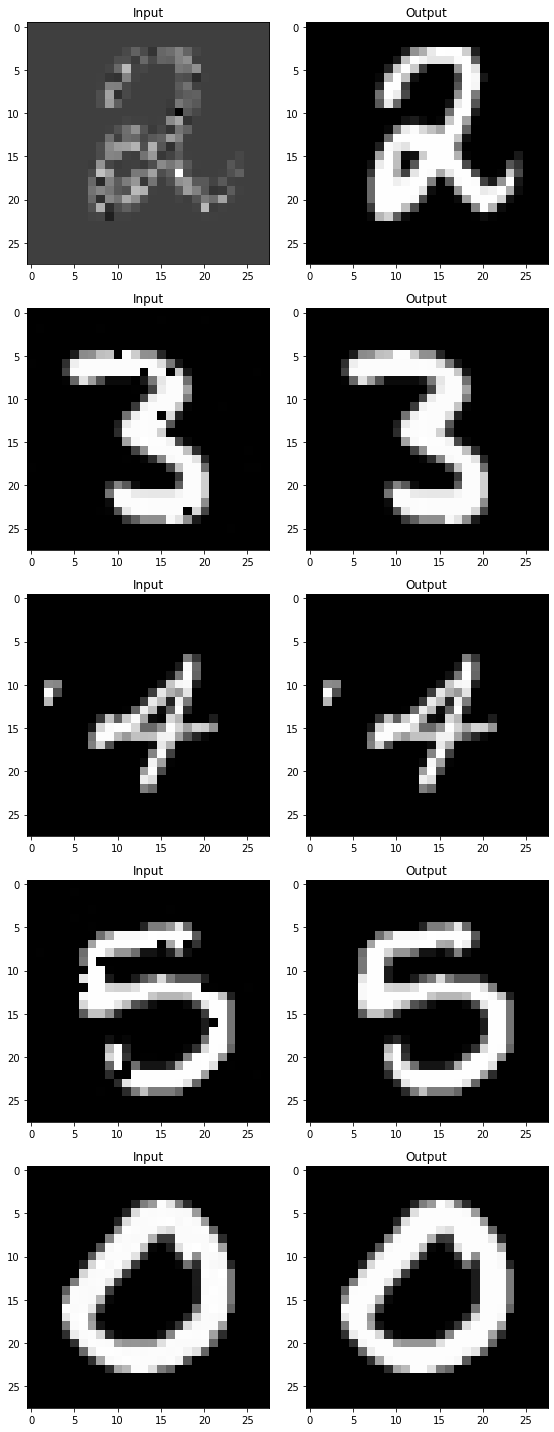

In [4]:
plot_image_pairs(data, ('Input', 'Output'))

In [5]:
(x_train, y_train), (x_val, y_val) = get_train_val_pair(data)
logging.info(f"Total training images: {len(x_train)}")
logging.info(f"Total validation images: {len(x_val)}")

INFO:root:Total training images: 238000
INFO:root:Total validation images: 42000


In [6]:
image_shape = x_train.shape[-2:]
total_pixels = np.prod(image_shape)

To understand the relationship between the number of hidden nodes, performance, and orthogonality, models will be iteratively built with increasing number of hidden nodes while collecting relevant metrics.

Non-orthogonality will measured as the average absolute cosine similarity of all vector pairs in the weight matrix.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 2)                 1570      
_________________________________________________________________
output_layer (Dense)         (None, 784)               2352      
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_______________________________

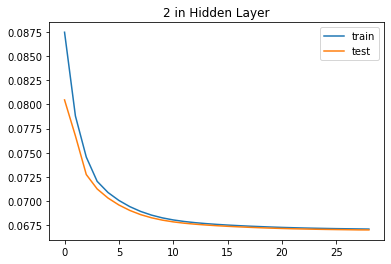

Hidden Nodes: 2
MSE: 0.0671
Non-Orthogonality: 0.174829
Time to Train: 41.08
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 3)                 2355      
_________________________________________________________________
output_layer (Dense)         (None, 784)               3136      
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 5,491
Trainable params: 5,491
Non-trainable params: 0
_________________________________________________________________


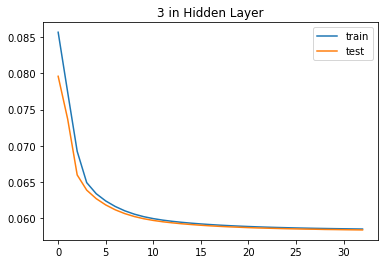

Hidden Nodes: 3
MSE: 0.0585
Non-Orthogonality: 0.055536
Time to Train: 42.62
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 4)                 3140      
_________________________________________________________________
output_layer (Dense)         (None, 784)               3920      
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 7,060
Trainable params: 7,060
Non-trainable params: 0
_________________________________________________________________


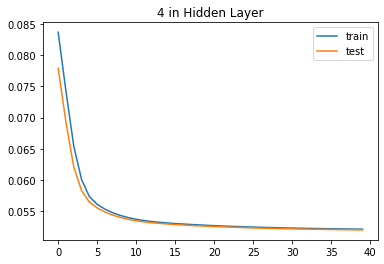

Hidden Nodes: 4
MSE: 0.0521
Non-Orthogonality: 0.089682
Time to Train: 52.46
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 5)                 3925      
_________________________________________________________________
output_layer (Dense)         (None, 784)               4704      
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 8,629
Trainable params: 8,629
Non-trainable params: 0
_________________________________________________________________


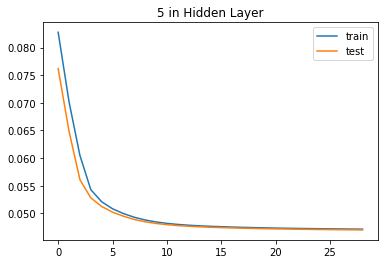

Hidden Nodes: 5
MSE: 0.0472
Non-Orthogonality: 0.133388
Time to Train: 37.33
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 6)                 4710      
_________________________________________________________________
output_layer (Dense)         (None, 784)               5488      
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 10,198
Trainable params: 10,198
Non-trainable params: 0
_________________________________________________________________


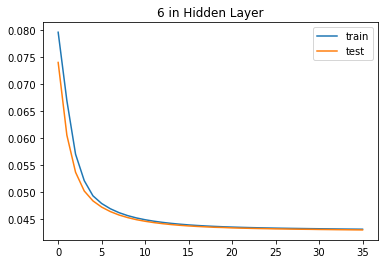

Hidden Nodes: 6
MSE: 0.0431
Non-Orthogonality: 0.132546
Time to Train: 48.62
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 7)                 5495      
_________________________________________________________________
output_layer (Dense)         (None, 784)               6272      
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 11,767
Trainable params: 11,767
Non-trainable params: 0
_________________________________________________________________


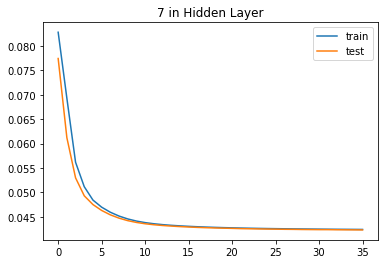

Hidden Nodes: 7
MSE: 0.0424
Non-Orthogonality: 0.128374
Time to Train: 47.57
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 8)                 6280      
_________________________________________________________________
output_layer (Dense)         (None, 784)               7056      
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 13,336
Trainable params: 13,336
Non-trainable params: 0
_________________________________________________________________


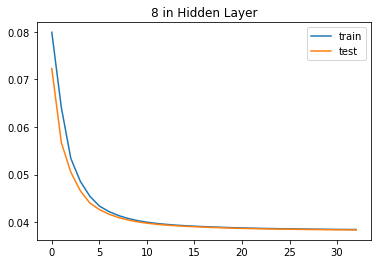

Hidden Nodes: 8
MSE: 0.0385
Non-Orthogonality: 0.102147
Time to Train: 42.18
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 9)                 7065      
_________________________________________________________________
output_layer (Dense)         (None, 784)               7840      
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 14,905
Trainable params: 14,905
Non-trainable params: 0
_________________________________________________________________


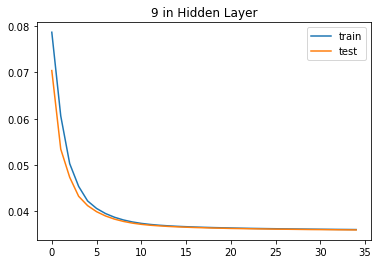

Hidden Nodes: 9
MSE: 0.0362
Non-Orthogonality: 0.101037
Time to Train: 44.13
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 10)                7850      
_________________________________________________________________
output_layer (Dense)         (None, 784)               8624      
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 16,474
Trainable params: 16,474
Non-trainable params: 0
_________________________________________________________________


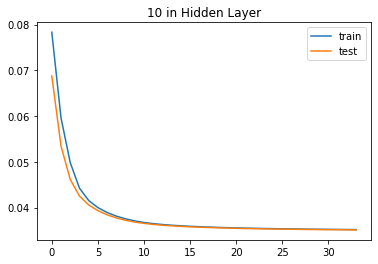

Hidden Nodes: 10
MSE: 0.0352
Non-Orthogonality: 0.105592
Time to Train: 42.09
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 11)                8635      
_________________________________________________________________
output_layer (Dense)         (None, 784)               9408      
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 18,043
Trainable params: 18,043
Non-trainable params: 0
_________________________________________________________________


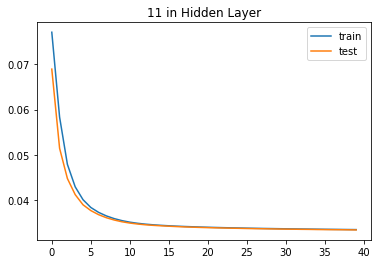

Hidden Nodes: 11
MSE: 0.0336
Non-Orthogonality: 0.086067
Time to Train: 53.47
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 12)                9420      
_________________________________________________________________
output_layer (Dense)         (None, 784)               10192     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 19,612
Trainable params: 19,612
Non-trainable params: 0
_________________________________________________________________


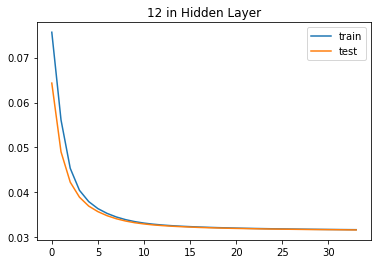

Hidden Nodes: 12
MSE: 0.0317
Non-Orthogonality: 0.091930
Time to Train: 44.93
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 13)                10205     
_________________________________________________________________
output_layer (Dense)         (None, 784)               10976     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 21,181
Trainable params: 21,181
Non-trainable params: 0
_________________________________________________________________


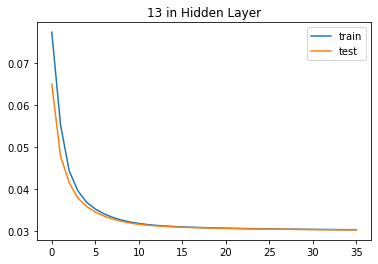

Hidden Nodes: 13
MSE: 0.0304
Non-Orthogonality: 0.093695
Time to Train: 46.81
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 14)                10990     
_________________________________________________________________
output_layer (Dense)         (None, 784)               11760     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 22,750
Trainable params: 22,750
Non-trainable params: 0
_________________________________________________________________


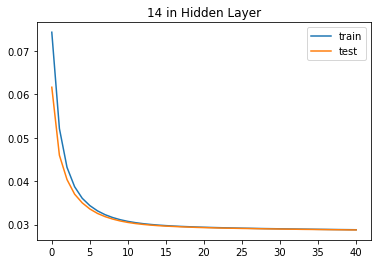

Hidden Nodes: 14
MSE: 0.0288
Non-Orthogonality: 0.084348
Time to Train: 50.55
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 15)                11775     
_________________________________________________________________
output_layer (Dense)         (None, 784)               12544     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 24,319
Trainable params: 24,319
Non-trainable params: 0
_________________________________________________________________


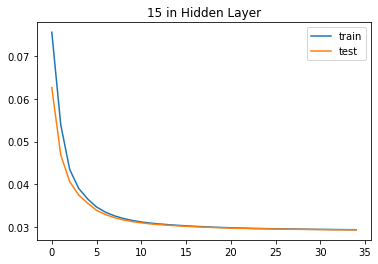

Hidden Nodes: 15
MSE: 0.0294
Non-Orthogonality: 0.077990
Time to Train: 41.59
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 16)                12560     
_________________________________________________________________
output_layer (Dense)         (None, 784)               13328     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 25,888
Trainable params: 25,888
Non-trainable params: 0
_________________________________________________________________


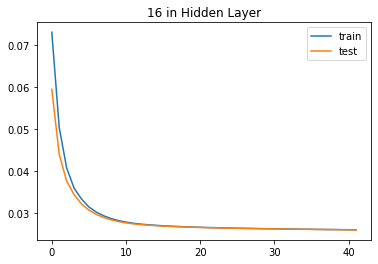

Hidden Nodes: 16
MSE: 0.0261
Non-Orthogonality: 0.073650
Time to Train: 49.07
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 17)                13345     
_________________________________________________________________
output_layer (Dense)         (None, 784)               14112     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 27,457
Trainable params: 27,457
Non-trainable params: 0
_________________________________________________________________


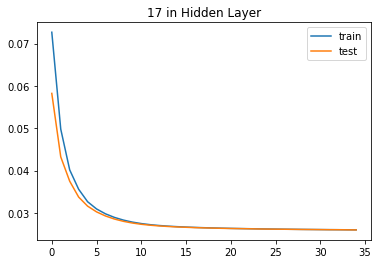

Hidden Nodes: 17
MSE: 0.0260
Non-Orthogonality: 0.080956
Time to Train: 42.13
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 18)                14130     
_________________________________________________________________
output_layer (Dense)         (None, 784)               14896     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 29,026
Trainable params: 29,026
Non-trainable params: 0
_________________________________________________________________


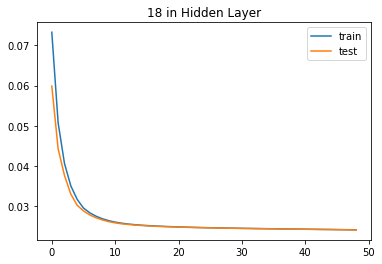

Hidden Nodes: 18
MSE: 0.0242
Non-Orthogonality: 0.075591
Time to Train: 62.66
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 19)                14915     
_________________________________________________________________
output_layer (Dense)         (None, 784)               15680     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 30,595
Trainable params: 30,595
Non-trainable params: 0
_________________________________________________________________


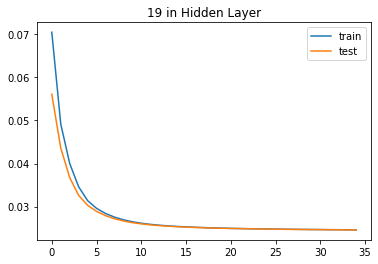

Hidden Nodes: 19
MSE: 0.0246
Non-Orthogonality: 0.075392
Time to Train: 43.71
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 20)                15700     
_________________________________________________________________
output_layer (Dense)         (None, 784)               16464     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 32,164
Trainable params: 32,164
Non-trainable params: 0
_________________________________________________________________


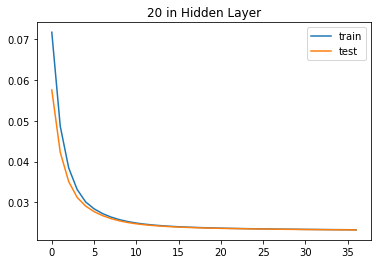

Hidden Nodes: 20
MSE: 0.0233
Non-Orthogonality: 0.076712
Time to Train: 45.41
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 21)                16485     
_________________________________________________________________
output_layer (Dense)         (None, 784)               17248     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 33,733
Trainable params: 33,733
Non-trainable params: 0
_________________________________________________________________


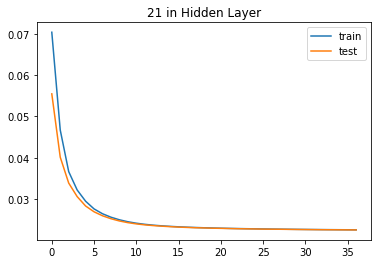

Hidden Nodes: 21
MSE: 0.0225
Non-Orthogonality: 0.069642
Time to Train: 45.68
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 22)                17270     
_________________________________________________________________
output_layer (Dense)         (None, 784)               18032     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 35,302
Trainable params: 35,302
Non-trainable params: 0
_________________________________________________________________


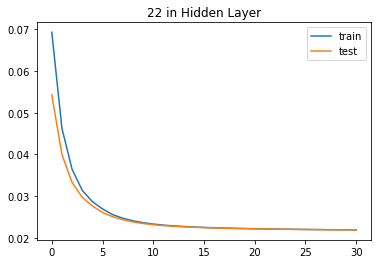

Hidden Nodes: 22
MSE: 0.0219
Non-Orthogonality: 0.076161
Time to Train: 37.42
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 23)                18055     
_________________________________________________________________
output_layer (Dense)         (None, 784)               18816     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 36,871
Trainable params: 36,871
Non-trainable params: 0
_________________________________________________________________


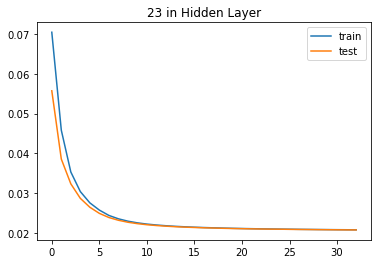

Hidden Nodes: 23
MSE: 0.0208
Non-Orthogonality: 0.071092
Time to Train: 41.31
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 24)                18840     
_________________________________________________________________
output_layer (Dense)         (None, 784)               19600     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 38,440
Trainable params: 38,440
Non-trainable params: 0
_________________________________________________________________


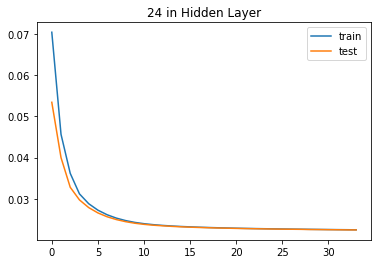

Hidden Nodes: 24
MSE: 0.0225
Non-Orthogonality: 0.072920
Time to Train: 42.00
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 25)                19625     
_________________________________________________________________
output_layer (Dense)         (None, 784)               20384     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 40,009
Trainable params: 40,009
Non-trainable params: 0
_________________________________________________________________


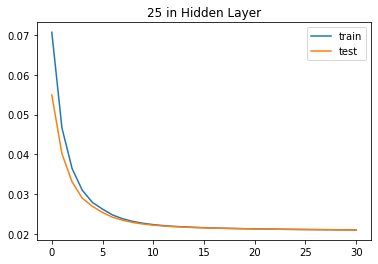

Hidden Nodes: 25
MSE: 0.0211
Non-Orthogonality: 0.068061
Time to Train: 38.07
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 26)                20410     
_________________________________________________________________
output_layer (Dense)         (None, 784)               21168     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 41,578
Trainable params: 41,578
Non-trainable params: 0
_________________________________________________________________


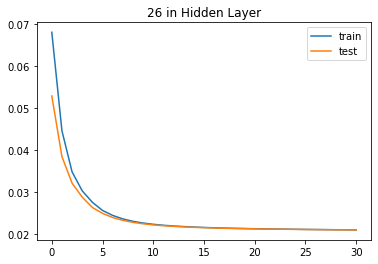

Hidden Nodes: 26
MSE: 0.0210
Non-Orthogonality: 0.071448
Time to Train: 36.26
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 27)                21195     
_________________________________________________________________
output_layer (Dense)         (None, 784)               21952     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 43,147
Trainable params: 43,147
Non-trainable params: 0
_________________________________________________________________


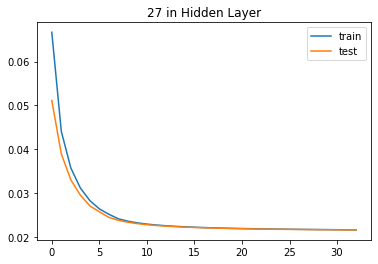

Hidden Nodes: 27
MSE: 0.0218
Non-Orthogonality: 0.069270
Time to Train: 40.63
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 28)                21980     
_________________________________________________________________
output_layer (Dense)         (None, 784)               22736     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 44,716
Trainable params: 44,716
Non-trainable params: 0
_________________________________________________________________


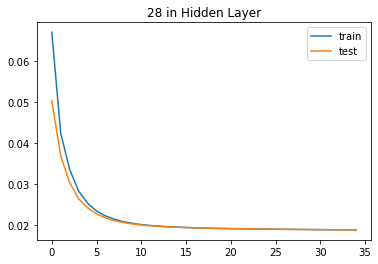

Hidden Nodes: 28
MSE: 0.0190
Non-Orthogonality: 0.067364
Time to Train: 43.82
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 29)                22765     
_________________________________________________________________
output_layer (Dense)         (None, 784)               23520     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 46,285
Trainable params: 46,285
Non-trainable params: 0
_________________________________________________________________


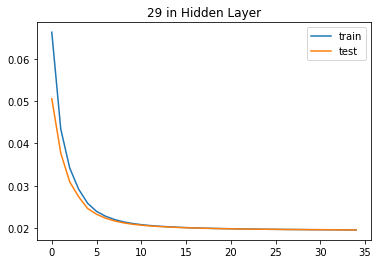

Hidden Nodes: 29
MSE: 0.0196
Non-Orthogonality: 0.070386
Time to Train: 44.73
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 30)                23550     
_________________________________________________________________
output_layer (Dense)         (None, 784)               24304     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 47,854
Trainable params: 47,854
Non-trainable params: 0
_________________________________________________________________


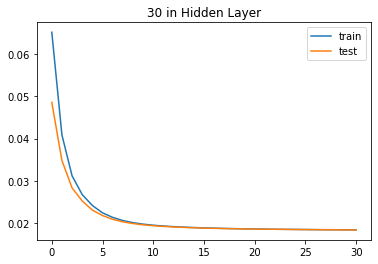

Hidden Nodes: 30
MSE: 0.0185
Non-Orthogonality: 0.069412
Time to Train: 38.56
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 31)                24335     
_________________________________________________________________
output_layer (Dense)         (None, 784)               25088     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 49,423
Trainable params: 49,423
Non-trainable params: 0
_________________________________________________________________


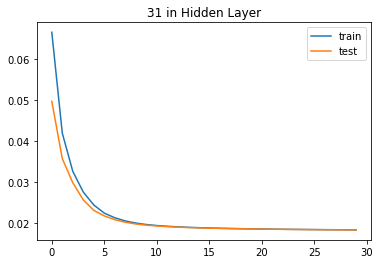

Hidden Nodes: 31
MSE: 0.0185
Non-Orthogonality: 0.065478
Time to Train: 36.29
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 32)                25120     
_________________________________________________________________
output_layer (Dense)         (None, 784)               25872     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


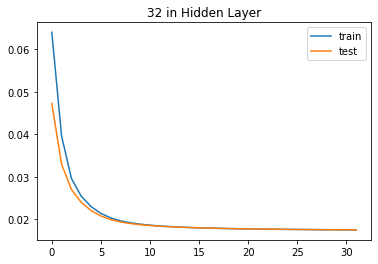

Hidden Nodes: 32
MSE: 0.0177
Non-Orthogonality: 0.069150
Time to Train: 39.11
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 33)                25905     
_________________________________________________________________
output_layer (Dense)         (None, 784)               26656     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 52,561
Trainable params: 52,561
Non-trainable params: 0
_________________________________________________________________


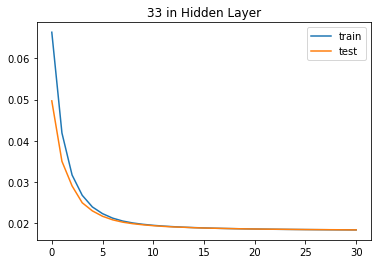

Hidden Nodes: 33
MSE: 0.0184
Non-Orthogonality: 0.068493
Time to Train: 37.89
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 34)                26690     
_________________________________________________________________
output_layer (Dense)         (None, 784)               27440     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 54,130
Trainable params: 54,130
Non-trainable params: 0
_________________________________________________________________


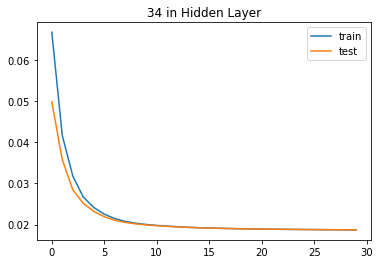

Hidden Nodes: 34
MSE: 0.0188
Non-Orthogonality: 0.070846
Time to Train: 39.31
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 35)                27475     
_________________________________________________________________
output_layer (Dense)         (None, 784)               28224     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 55,699
Trainable params: 55,699
Non-trainable params: 0
_________________________________________________________________


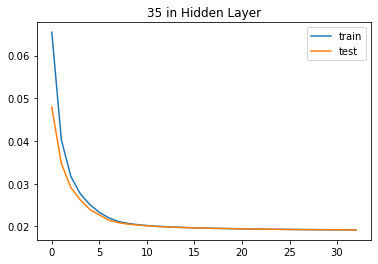

Hidden Nodes: 35
MSE: 0.0193
Non-Orthogonality: 0.069310
Time to Train: 44.00
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 36)                28260     
_________________________________________________________________
output_layer (Dense)         (None, 784)               29008     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 57,268
Trainable params: 57,268
Non-trainable params: 0
_________________________________________________________________


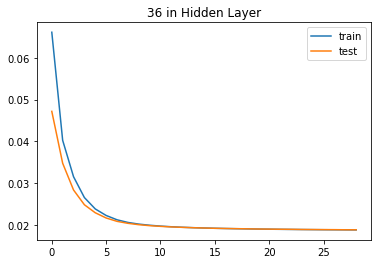

Hidden Nodes: 36
MSE: 0.0189
Non-Orthogonality: 0.070092
Time to Train: 38.15
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 37)                29045     
_________________________________________________________________
output_layer (Dense)         (None, 784)               29792     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 58,837
Trainable params: 58,837
Non-trainable params: 0
_________________________________________________________________


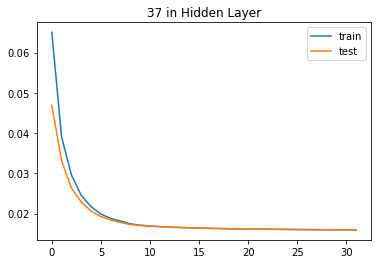

Hidden Nodes: 37
MSE: 0.0160
Non-Orthogonality: 0.070061
Time to Train: 42.41
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 38)                29830     
_________________________________________________________________
output_layer (Dense)         (None, 784)               30576     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 60,406
Trainable params: 60,406
Non-trainable params: 0
_________________________________________________________________


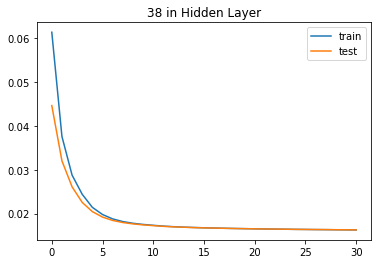

Hidden Nodes: 38
MSE: 0.0164
Non-Orthogonality: 0.069135
Time to Train: 41.15
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 39)                30615     
_________________________________________________________________
output_layer (Dense)         (None, 784)               31360     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 61,975
Trainable params: 61,975
Non-trainable params: 0
_________________________________________________________________


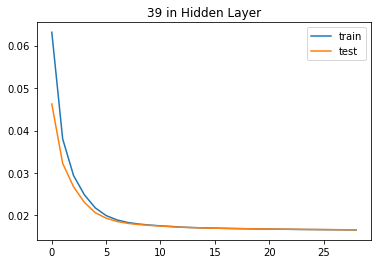

Hidden Nodes: 39
MSE: 0.0167
Non-Orthogonality: 0.067338
Time to Train: 38.92
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 40)                31400     
_________________________________________________________________
output_layer (Dense)         (None, 784)               32144     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 63,544
Trainable params: 63,544
Non-trainable params: 0
_________________________________________________________________


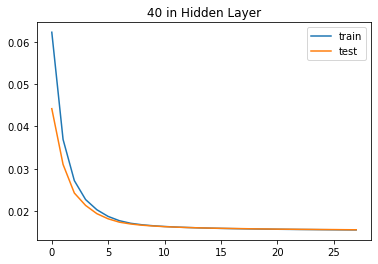

Hidden Nodes: 40
MSE: 0.0157
Non-Orthogonality: 0.066338
Time to Train: 37.34
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 41)                32185     
_________________________________________________________________
output_layer (Dense)         (None, 784)               32928     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 65,113
Trainable params: 65,113
Non-trainable params: 0
_________________________________________________________________


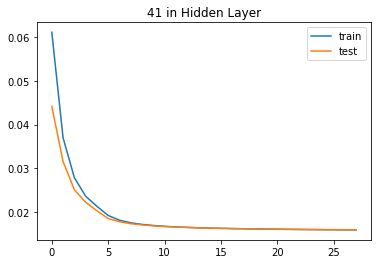

Hidden Nodes: 41
MSE: 0.0161
Non-Orthogonality: 0.066184
Time to Train: 37.92
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 42)                32970     
_________________________________________________________________
output_layer (Dense)         (None, 784)               33712     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 66,682
Trainable params: 66,682
Non-trainable params: 0
_________________________________________________________________


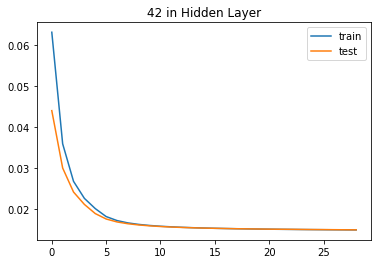

Hidden Nodes: 42
MSE: 0.0151
Non-Orthogonality: 0.067740
Time to Train: 39.70
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 43)                33755     
_________________________________________________________________
output_layer (Dense)         (None, 784)               34496     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 68,251
Trainable params: 68,251
Non-trainable params: 0
_________________________________________________________________


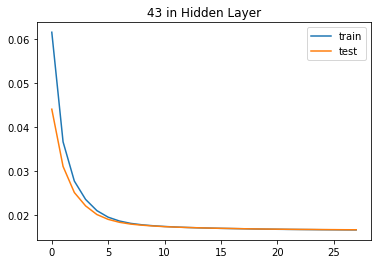

Hidden Nodes: 43
MSE: 0.0167
Non-Orthogonality: 0.066273
Time to Train: 36.61
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 44)                34540     
_________________________________________________________________
output_layer (Dense)         (None, 784)               35280     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 69,820
Trainable params: 69,820
Non-trainable params: 0
_________________________________________________________________


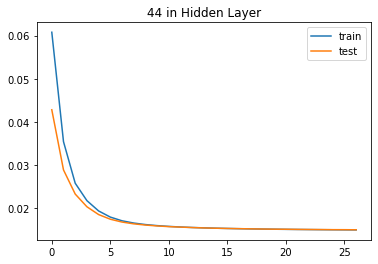

Hidden Nodes: 44
MSE: 0.0152
Non-Orthogonality: 0.066028
Time to Train: 34.43
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 45)                35325     
_________________________________________________________________
output_layer (Dense)         (None, 784)               36064     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 71,389
Trainable params: 71,389
Non-trainable params: 0
_________________________________________________________________


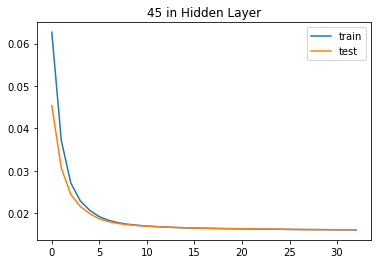

Hidden Nodes: 45
MSE: 0.0162
Non-Orthogonality: 0.064398
Time to Train: 43.97
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 46)                36110     
_________________________________________________________________
output_layer (Dense)         (None, 784)               36848     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 72,958
Trainable params: 72,958
Non-trainable params: 0
_________________________________________________________________


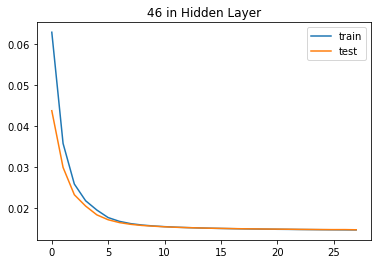

Hidden Nodes: 46
MSE: 0.0148
Non-Orthogonality: 0.066066
Time to Train: 37.84
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 47)                36895     
_________________________________________________________________
output_layer (Dense)         (None, 784)               37632     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 74,527
Trainable params: 74,527
Non-trainable params: 0
_________________________________________________________________


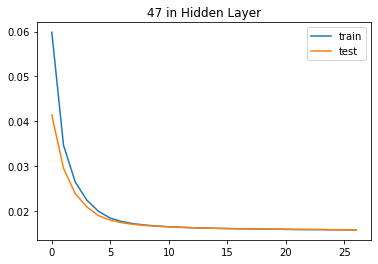

Hidden Nodes: 47
MSE: 0.0159
Non-Orthogonality: 0.066796
Time to Train: 36.33
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 48)                37680     
_________________________________________________________________
output_layer (Dense)         (None, 784)               38416     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 76,096
Trainable params: 76,096
Non-trainable params: 0
_________________________________________________________________


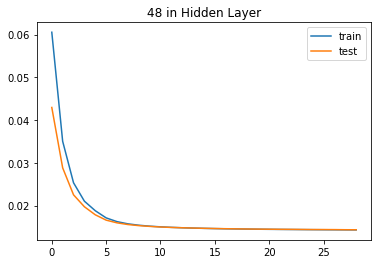

Hidden Nodes: 48
MSE: 0.0144
Non-Orthogonality: 0.063797
Time to Train: 38.18
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 49)                38465     
_________________________________________________________________
output_layer (Dense)         (None, 784)               39200     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 77,665
Trainable params: 77,665
Non-trainable params: 0
_________________________________________________________________


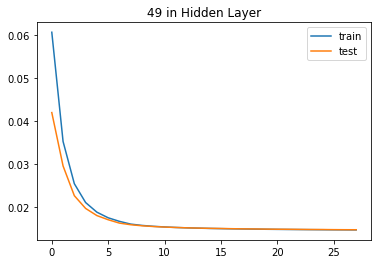

Hidden Nodes: 49
MSE: 0.0148
Non-Orthogonality: 0.063755
Time to Train: 37.40
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 50)                39250     
_________________________________________________________________
output_layer (Dense)         (None, 784)               39984     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 79,234
Trainable params: 79,234
Non-trainable params: 0
_________________________________________________________________


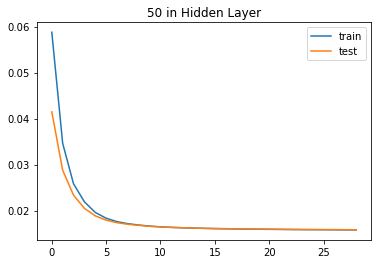

Hidden Nodes: 50
MSE: 0.0159
Non-Orthogonality: 0.064816
Time to Train: 37.26
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 51)                40035     
_________________________________________________________________
output_layer (Dense)         (None, 784)               40768     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 80,803
Trainable params: 80,803
Non-trainable params: 0
_________________________________________________________________


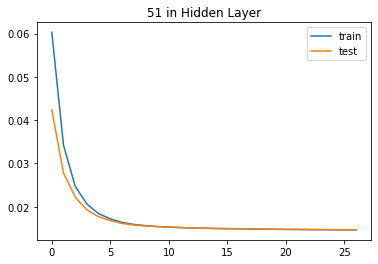

Hidden Nodes: 51
MSE: 0.0148
Non-Orthogonality: 0.062354
Time to Train: 35.26
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 52)                40820     
_________________________________________________________________
output_layer (Dense)         (None, 784)               41552     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 82,372
Trainable params: 82,372
Non-trainable params: 0
_________________________________________________________________


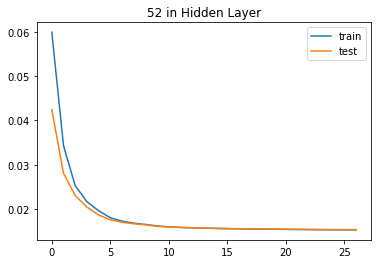

Hidden Nodes: 52
MSE: 0.0154
Non-Orthogonality: 0.062957
Time to Train: 34.37
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 53)                41605     
_________________________________________________________________
output_layer (Dense)         (None, 784)               42336     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 83,941
Trainable params: 83,941
Non-trainable params: 0
_________________________________________________________________


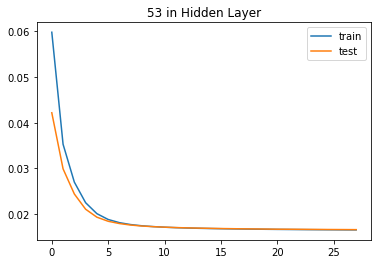

Hidden Nodes: 53
MSE: 0.0167
Non-Orthogonality: 0.065713
Time to Train: 35.02
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 54)                42390     
_________________________________________________________________
output_layer (Dense)         (None, 784)               43120     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 85,510
Trainable params: 85,510
Non-trainable params: 0
_________________________________________________________________


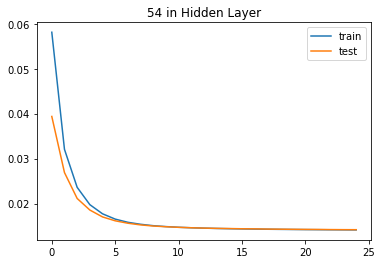

Hidden Nodes: 54
MSE: 0.0143
Non-Orthogonality: 0.064371
Time to Train: 33.63
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 55)                43175     
_________________________________________________________________
output_layer (Dense)         (None, 784)               43904     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 87,079
Trainable params: 87,079
Non-trainable params: 0
_________________________________________________________________


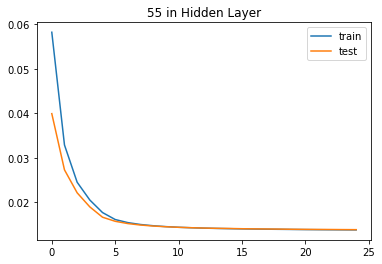

Hidden Nodes: 55
MSE: 0.0140
Non-Orthogonality: 0.063823
Time to Train: 33.37
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 56)                43960     
_________________________________________________________________
output_layer (Dense)         (None, 784)               44688     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 88,648
Trainable params: 88,648
Non-trainable params: 0
_________________________________________________________________


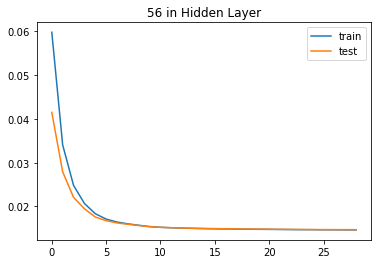

Hidden Nodes: 56
MSE: 0.0148
Non-Orthogonality: 0.062988
Time to Train: 37.71
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 57)                44745     
_________________________________________________________________
output_layer (Dense)         (None, 784)               45472     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 90,217
Trainable params: 90,217
Non-trainable params: 0
_________________________________________________________________


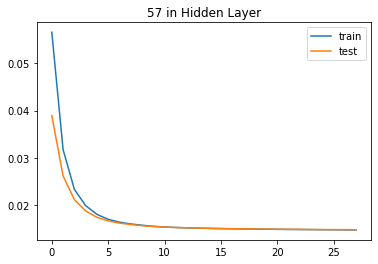

Hidden Nodes: 57
MSE: 0.0150
Non-Orthogonality: 0.065029
Time to Train: 37.10
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 58)                45530     
_________________________________________________________________
output_layer (Dense)         (None, 784)               46256     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 91,786
Trainable params: 91,786
Non-trainable params: 0
_________________________________________________________________


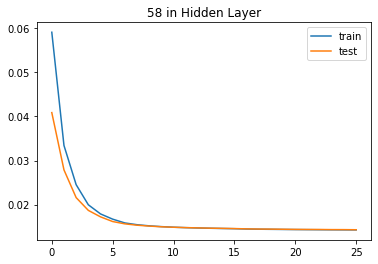

Hidden Nodes: 58
MSE: 0.0144
Non-Orthogonality: 0.061195
Time to Train: 34.11
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 59)                46315     
_________________________________________________________________
output_layer (Dense)         (None, 784)               47040     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 93,355
Trainable params: 93,355
Non-trainable params: 0
_________________________________________________________________


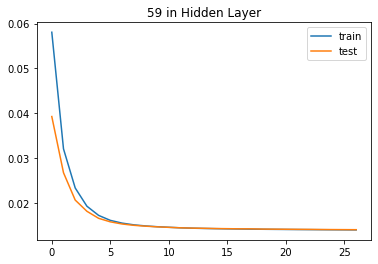

Hidden Nodes: 59
MSE: 0.0142
Non-Orthogonality: 0.064599
Time to Train: 36.65
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 60)                47100     
_________________________________________________________________
output_layer (Dense)         (None, 784)               47824     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 94,924
Trainable params: 94,924
Non-trainable params: 0
_________________________________________________________________


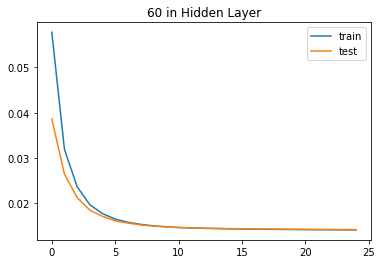

Hidden Nodes: 60
MSE: 0.0143
Non-Orthogonality: 0.061426
Time to Train: 31.95
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 61)                47885     
_________________________________________________________________
output_layer (Dense)         (None, 784)               48608     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 96,493
Trainable params: 96,493
Non-trainable params: 0
_________________________________________________________________


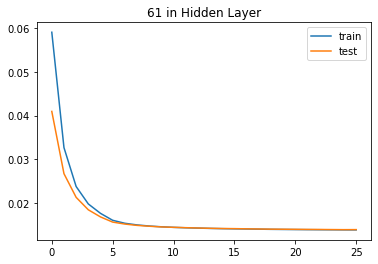

Hidden Nodes: 61
MSE: 0.0140
Non-Orthogonality: 0.062798
Time to Train: 36.18
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 62)                48670     
_________________________________________________________________
output_layer (Dense)         (None, 784)               49392     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 98,062
Trainable params: 98,062
Non-trainable params: 0
_________________________________________________________________


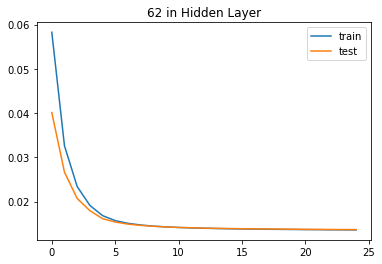

Hidden Nodes: 62
MSE: 0.0138
Non-Orthogonality: 0.062740
Time to Train: 33.27
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 63)                49455     
_________________________________________________________________
output_layer (Dense)         (None, 784)               50176     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 99,631
Trainable params: 99,631
Non-trainable params: 0
_________________________________________________________________


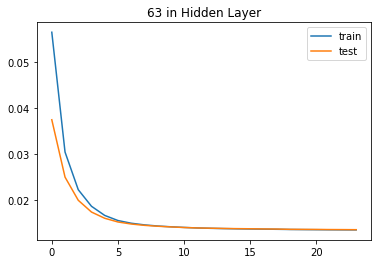

Hidden Nodes: 63
MSE: 0.0136
Non-Orthogonality: 0.061511
Time to Train: 31.66
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 64)                50240     
_________________________________________________________________
output_layer (Dense)         (None, 784)               50960     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


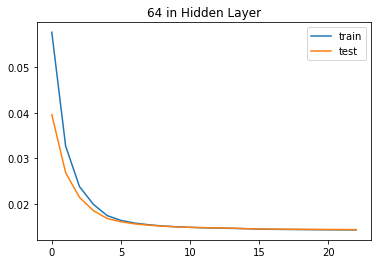

Hidden Nodes: 64
MSE: 0.0144
Non-Orthogonality: 0.062030
Time to Train: 30.35
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 65)                51025     
_________________________________________________________________
output_layer (Dense)         (None, 784)               51744     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 102,769
Trainable params: 102,769
Non-trainable params: 0
_________________________________________________________________


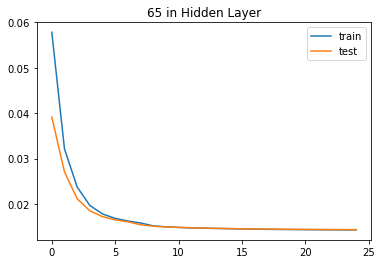

Hidden Nodes: 65
MSE: 0.0144
Non-Orthogonality: 0.061751
Time to Train: 31.94
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 66)                51810     
_________________________________________________________________
output_layer (Dense)         (None, 784)               52528     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 104,338
Trainable params: 104,338
Non-trainable params: 0
_________________________________________________________________


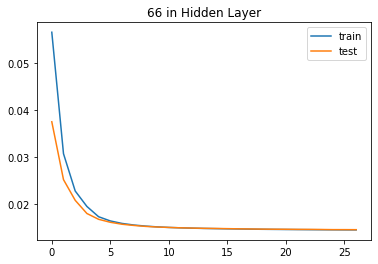

Hidden Nodes: 66
MSE: 0.0147
Non-Orthogonality: 0.061472
Time to Train: 35.48
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 67)                52595     
_________________________________________________________________
output_layer (Dense)         (None, 784)               53312     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 105,907
Trainable params: 105,907
Non-trainable params: 0
_________________________________________________________________


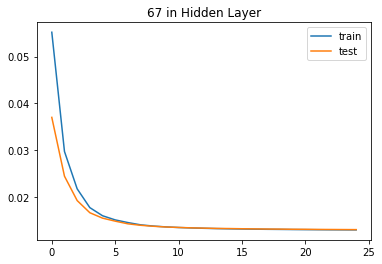

Hidden Nodes: 67
MSE: 0.0131
Non-Orthogonality: 0.063267
Time to Train: 33.33
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 68)                53380     
_________________________________________________________________
output_layer (Dense)         (None, 784)               54096     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 107,476
Trainable params: 107,476
Non-trainable params: 0
_________________________________________________________________


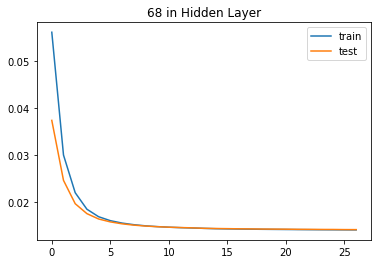

Hidden Nodes: 68
MSE: 0.0143
Non-Orthogonality: 0.062698
Time to Train: 36.18
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 69)                54165     
_________________________________________________________________
output_layer (Dense)         (None, 784)               54880     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 109,045
Trainable params: 109,045
Non-trainable params: 0
_________________________________________________________________


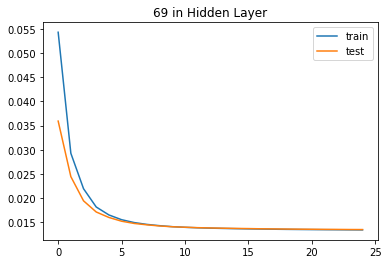

Hidden Nodes: 69
MSE: 0.0136
Non-Orthogonality: 0.063357
Time to Train: 33.13
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 70)                54950     
_________________________________________________________________
output_layer (Dense)         (None, 784)               55664     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 110,614
Trainable params: 110,614
Non-trainable params: 0
_________________________________________________________________


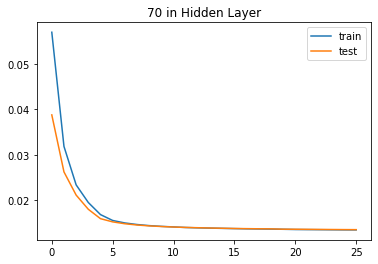

Hidden Nodes: 70
MSE: 0.0136
Non-Orthogonality: 0.061995
Time to Train: 34.48
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 71)                55735     
_________________________________________________________________
output_layer (Dense)         (None, 784)               56448     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 112,183
Trainable params: 112,183
Non-trainable params: 0
_________________________________________________________________


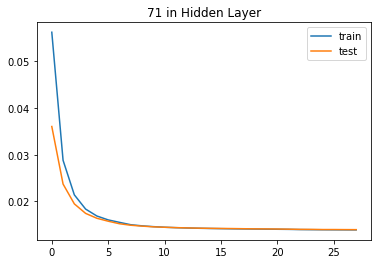

Hidden Nodes: 71
MSE: 0.0141
Non-Orthogonality: 0.061282
Time to Train: 37.19
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 72)                56520     
_________________________________________________________________
output_layer (Dense)         (None, 784)               57232     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 113,752
Trainable params: 113,752
Non-trainable params: 0
_________________________________________________________________


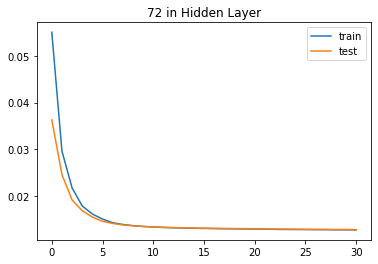

Hidden Nodes: 72
MSE: 0.0130
Non-Orthogonality: 0.062151
Time to Train: 40.60
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 73)                57305     
_________________________________________________________________
output_layer (Dense)         (None, 784)               58016     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 115,321
Trainable params: 115,321
Non-trainable params: 0
_________________________________________________________________


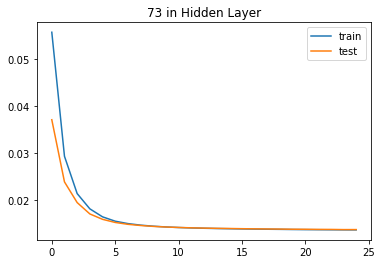

Hidden Nodes: 73
MSE: 0.0138
Non-Orthogonality: 0.061542
Time to Train: 32.83
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 74)                58090     
_________________________________________________________________
output_layer (Dense)         (None, 784)               58800     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 116,890
Trainable params: 116,890
Non-trainable params: 0
_________________________________________________________________


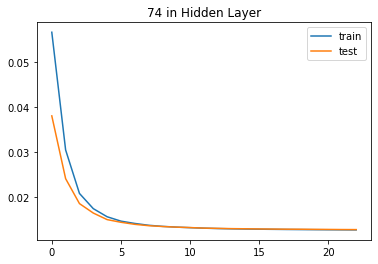

Hidden Nodes: 74
MSE: 0.0128
Non-Orthogonality: 0.062774
Time to Train: 29.95
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 75)                58875     
_________________________________________________________________
output_layer (Dense)         (None, 784)               59584     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 118,459
Trainable params: 118,459
Non-trainable params: 0
_________________________________________________________________


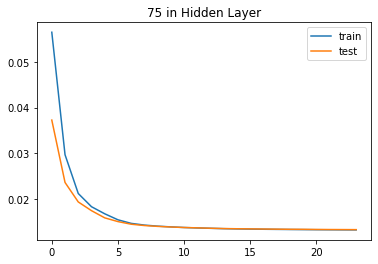

Hidden Nodes: 75
MSE: 0.0134
Non-Orthogonality: 0.062385
Time to Train: 31.83
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 76)                59660     
_________________________________________________________________
output_layer (Dense)         (None, 784)               60368     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 120,028
Trainable params: 120,028
Non-trainable params: 0
_________________________________________________________________


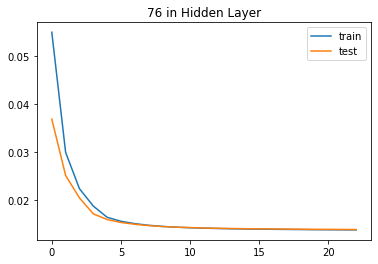

Hidden Nodes: 76
MSE: 0.0140
Non-Orthogonality: 0.062071
Time to Train: 30.62
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 77)                60445     
_________________________________________________________________
output_layer (Dense)         (None, 784)               61152     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 121,597
Trainable params: 121,597
Non-trainable params: 0
_________________________________________________________________


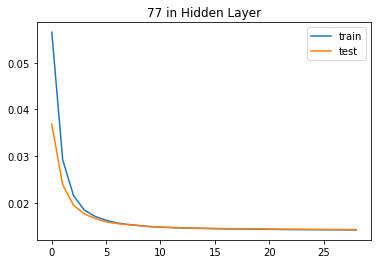

Hidden Nodes: 77
MSE: 0.0144
Non-Orthogonality: 0.061463
Time to Train: 37.72
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 78)                61230     
_________________________________________________________________
output_layer (Dense)         (None, 784)               61936     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 123,166
Trainable params: 123,166
Non-trainable params: 0
_________________________________________________________________


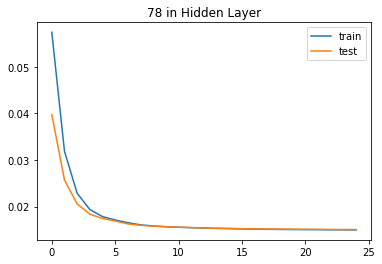

Hidden Nodes: 78
MSE: 0.0152
Non-Orthogonality: 0.062008
Time to Train: 31.69
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 79)                62015     
_________________________________________________________________
output_layer (Dense)         (None, 784)               62720     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 124,735
Trainable params: 124,735
Non-trainable params: 0
_________________________________________________________________


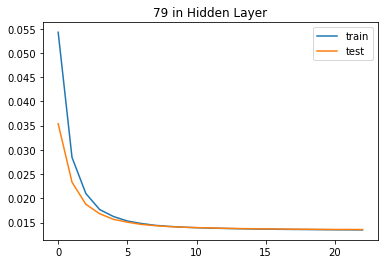

Hidden Nodes: 79
MSE: 0.0137
Non-Orthogonality: 0.060821
Time to Train: 31.53
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 80)                62800     
_________________________________________________________________
output_layer (Dense)         (None, 784)               63504     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 126,304
Trainable params: 126,304
Non-trainable params: 0
_________________________________________________________________


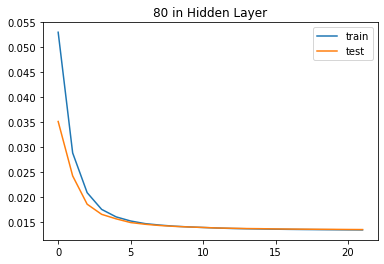

Hidden Nodes: 80
MSE: 0.0135
Non-Orthogonality: 0.060951
Time to Train: 29.28
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 81)                63585     
_________________________________________________________________
output_layer (Dense)         (None, 784)               64288     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 127,873
Trainable params: 127,873
Non-trainable params: 0
_________________________________________________________________


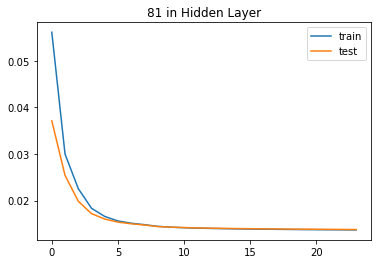

Hidden Nodes: 81
MSE: 0.0138
Non-Orthogonality: 0.062457
Time to Train: 32.29
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 82)                64370     
_________________________________________________________________
output_layer (Dense)         (None, 784)               65072     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 129,442
Trainable params: 129,442
Non-trainable params: 0
_________________________________________________________________


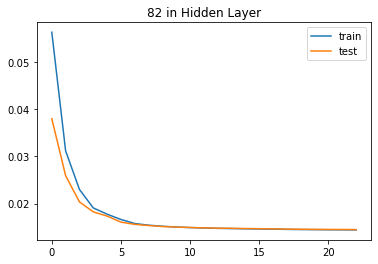

Hidden Nodes: 82
MSE: 0.0146
Non-Orthogonality: 0.062277
Time to Train: 30.56
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 83)                65155     
_________________________________________________________________
output_layer (Dense)         (None, 784)               65856     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 131,011
Trainable params: 131,011
Non-trainable params: 0
_________________________________________________________________


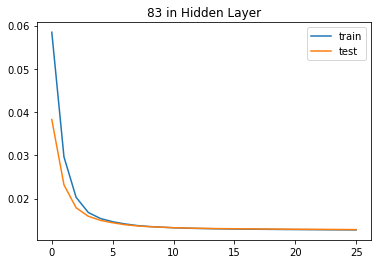

Hidden Nodes: 83
MSE: 0.0129
Non-Orthogonality: 0.061224
Time to Train: 34.50
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 84)                65940     
_________________________________________________________________
output_layer (Dense)         (None, 784)               66640     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 132,580
Trainable params: 132,580
Non-trainable params: 0
_________________________________________________________________


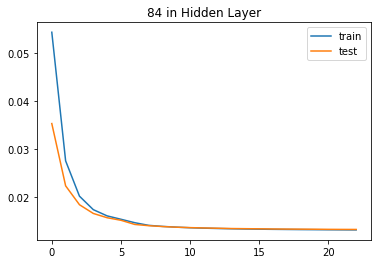

Hidden Nodes: 84
MSE: 0.0133
Non-Orthogonality: 0.062809
Time to Train: 31.30
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 85)                66725     
_________________________________________________________________
output_layer (Dense)         (None, 784)               67424     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 134,149
Trainable params: 134,149
Non-trainable params: 0
_________________________________________________________________


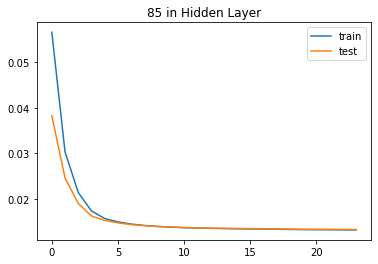

Hidden Nodes: 85
MSE: 0.0134
Non-Orthogonality: 0.060240
Time to Train: 29.56
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 86)                67510     
_________________________________________________________________
output_layer (Dense)         (None, 784)               68208     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 135,718
Trainable params: 135,718
Non-trainable params: 0
_________________________________________________________________


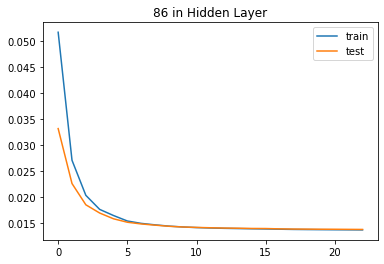

Hidden Nodes: 86
MSE: 0.0139
Non-Orthogonality: 0.059768
Time to Train: 31.58
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 87)                68295     
_________________________________________________________________
output_layer (Dense)         (None, 784)               68992     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 137,287
Trainable params: 137,287
Non-trainable params: 0
_________________________________________________________________


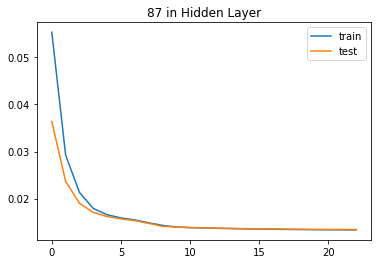

Hidden Nodes: 87
MSE: 0.0135
Non-Orthogonality: 0.061046
Time to Train: 30.16
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 88)                69080     
_________________________________________________________________
output_layer (Dense)         (None, 784)               69776     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 138,856
Trainable params: 138,856
Non-trainable params: 0
_________________________________________________________________


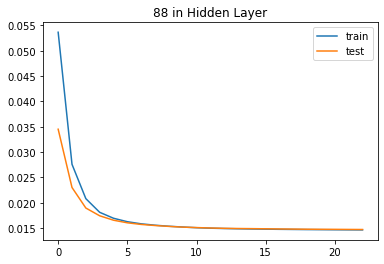

Hidden Nodes: 88
MSE: 0.0148
Non-Orthogonality: 0.060560
Time to Train: 30.75
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 89)                69865     
_________________________________________________________________
output_layer (Dense)         (None, 784)               70560     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 140,425
Trainable params: 140,425
Non-trainable params: 0
_________________________________________________________________


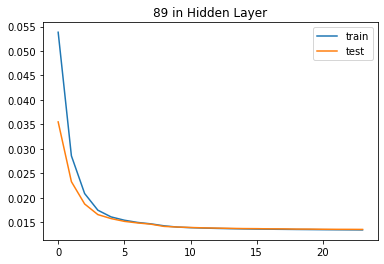

Hidden Nodes: 89
MSE: 0.0136
Non-Orthogonality: 0.059614
Time to Train: 32.18
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 90)                70650     
_________________________________________________________________
output_layer (Dense)         (None, 784)               71344     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 141,994
Trainable params: 141,994
Non-trainable params: 0
_________________________________________________________________


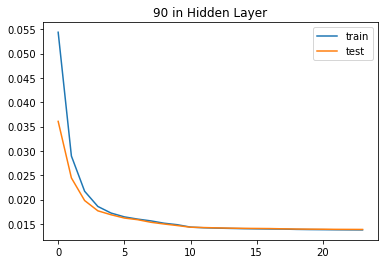

Hidden Nodes: 90
MSE: 0.0139
Non-Orthogonality: 0.061002
Time to Train: 31.27
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 91)                71435     
_________________________________________________________________
output_layer (Dense)         (None, 784)               72128     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 143,563
Trainable params: 143,563
Non-trainable params: 0
_________________________________________________________________


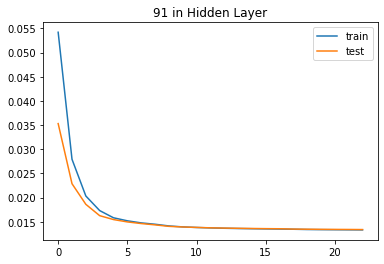

Hidden Nodes: 91
MSE: 0.0135
Non-Orthogonality: 0.059617
Time to Train: 31.35
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 92)                72220     
_________________________________________________________________
output_layer (Dense)         (None, 784)               72912     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 145,132
Trainable params: 145,132
Non-trainable params: 0
_________________________________________________________________


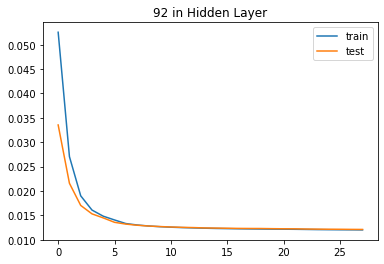

Hidden Nodes: 92
MSE: 0.0122
Non-Orthogonality: 0.059247
Time to Train: 37.41
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 93)                73005     
_________________________________________________________________
output_layer (Dense)         (None, 784)               73696     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 146,701
Trainable params: 146,701
Non-trainable params: 0
_________________________________________________________________


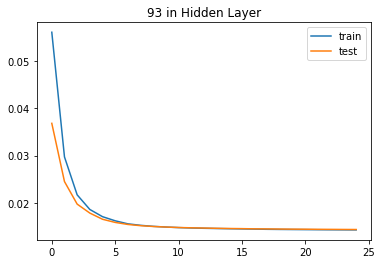

Hidden Nodes: 93
MSE: 0.0145
Non-Orthogonality: 0.059969
Time to Train: 33.79
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 94)                73790     
_________________________________________________________________
output_layer (Dense)         (None, 784)               74480     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 148,270
Trainable params: 148,270
Non-trainable params: 0
_________________________________________________________________


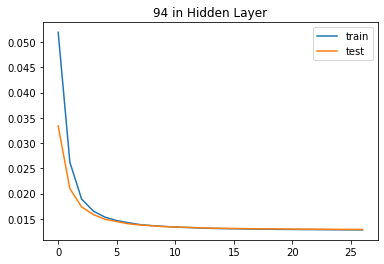

Hidden Nodes: 94
MSE: 0.0130
Non-Orthogonality: 0.058846
Time to Train: 36.59
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 95)                74575     
_________________________________________________________________
output_layer (Dense)         (None, 784)               75264     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 149,839
Trainable params: 149,839
Non-trainable params: 0
_________________________________________________________________


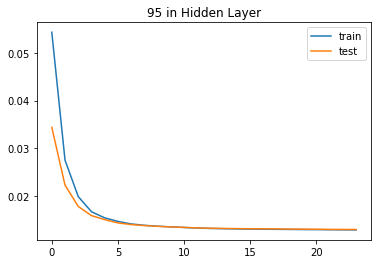

Hidden Nodes: 95
MSE: 0.0131
Non-Orthogonality: 0.059694
Time to Train: 32.05
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 96)                75360     
_________________________________________________________________
output_layer (Dense)         (None, 784)               76048     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 151,408
Trainable params: 151,408
Non-trainable params: 0
_________________________________________________________________


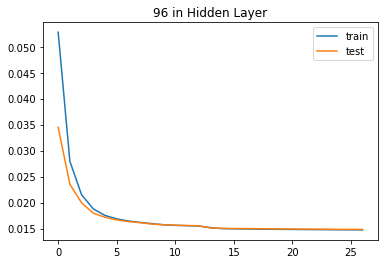

Hidden Nodes: 96
MSE: 0.0149
Non-Orthogonality: 0.059728
Time to Train: 34.39
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 97)                76145     
_________________________________________________________________
output_layer (Dense)         (None, 784)               76832     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 152,977
Trainable params: 152,977
Non-trainable params: 0
_________________________________________________________________


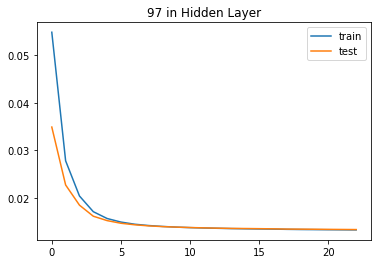

Hidden Nodes: 97
MSE: 0.0134
Non-Orthogonality: 0.059845
Time to Train: 31.34
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 98)                76930     
_________________________________________________________________
output_layer (Dense)         (None, 784)               77616     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 154,546
Trainable params: 154,546
Non-trainable params: 0
_________________________________________________________________


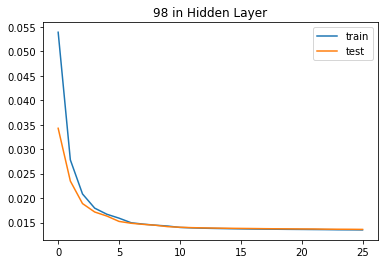

Hidden Nodes: 98
MSE: 0.0137
Non-Orthogonality: 0.060342
Time to Train: 34.80
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 99)                77715     
_________________________________________________________________
output_layer (Dense)         (None, 784)               78400     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 156,115
Trainable params: 156,115
Non-trainable params: 0
_________________________________________________________________


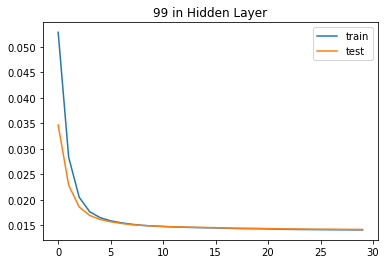

Hidden Nodes: 99
MSE: 0.0143
Non-Orthogonality: 0.058404
Time to Train: 39.39
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 100)               78500     
_________________________________________________________________
output_layer (Dense)         (None, 784)               79184     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 157,684
Trainable params: 157,684
Non-trainable params: 0
_________________________________________________________________


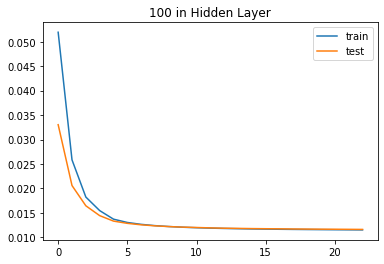

Hidden Nodes: 100
MSE: 0.0117
Non-Orthogonality: 0.060383
Time to Train: 29.56
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 101)               79285     
_________________________________________________________________
output_layer (Dense)         (None, 784)               79968     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 159,253
Trainable params: 159,253
Non-trainable params: 0
_________________________________________________________________


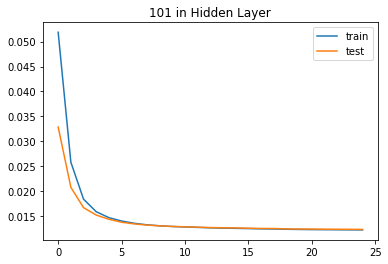

Hidden Nodes: 101
MSE: 0.0124
Non-Orthogonality: 0.060329
Time to Train: 32.50
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 102)               80070     
_________________________________________________________________
output_layer (Dense)         (None, 784)               80752     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 160,822
Trainable params: 160,822
Non-trainable params: 0
_________________________________________________________________


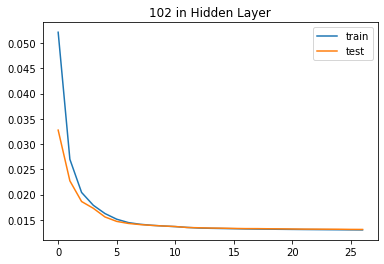

Hidden Nodes: 102
MSE: 0.0132
Non-Orthogonality: 0.059624
Time to Train: 36.65
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 103)               80855     
_________________________________________________________________
output_layer (Dense)         (None, 784)               81536     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 162,391
Trainable params: 162,391
Non-trainable params: 0
_________________________________________________________________


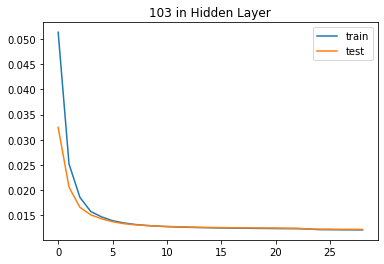

Hidden Nodes: 103
MSE: 0.0123
Non-Orthogonality: 0.058906
Time to Train: 38.35
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 104)               81640     
_________________________________________________________________
output_layer (Dense)         (None, 784)               82320     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 163,960
Trainable params: 163,960
Non-trainable params: 0
_________________________________________________________________


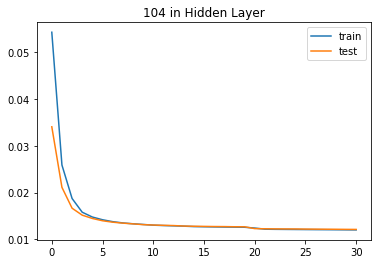

Hidden Nodes: 104
MSE: 0.0122
Non-Orthogonality: 0.059327
Time to Train: 40.60
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 105)               82425     
_________________________________________________________________
output_layer (Dense)         (None, 784)               83104     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 165,529
Trainable params: 165,529
Non-trainable params: 0
_________________________________________________________________


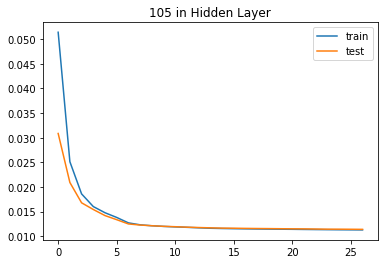

Hidden Nodes: 105
MSE: 0.0115
Non-Orthogonality: 0.060363
Time to Train: 35.18
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 106)               83210     
_________________________________________________________________
output_layer (Dense)         (None, 784)               83888     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 167,098
Trainable params: 167,098
Non-trainable params: 0
_________________________________________________________________


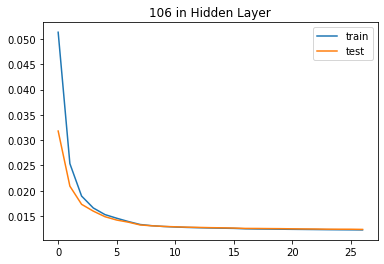

Hidden Nodes: 106
MSE: 0.0125
Non-Orthogonality: 0.059659
Time to Train: 36.22
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 107)               83995     
_________________________________________________________________
output_layer (Dense)         (None, 784)               84672     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 168,667
Trainable params: 168,667
Non-trainable params: 0
_________________________________________________________________


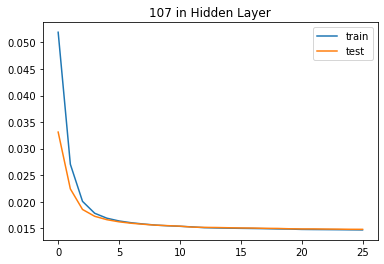

Hidden Nodes: 107
MSE: 0.0149
Non-Orthogonality: 0.058389
Time to Train: 34.26
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 108)               84780     
_________________________________________________________________
output_layer (Dense)         (None, 784)               85456     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 170,236
Trainable params: 170,236
Non-trainable params: 0
_________________________________________________________________


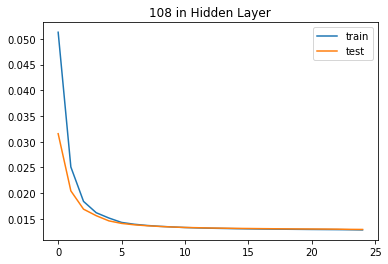

Hidden Nodes: 108
MSE: 0.0131
Non-Orthogonality: 0.058298
Time to Train: 34.21
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 109)               85565     
_________________________________________________________________
output_layer (Dense)         (None, 784)               86240     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 171,805
Trainable params: 171,805
Non-trainable params: 0
_________________________________________________________________


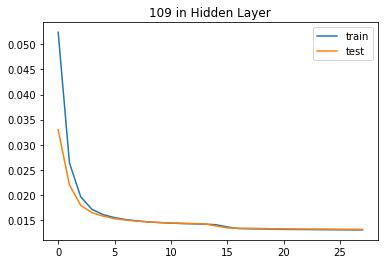

Hidden Nodes: 109
MSE: 0.0132
Non-Orthogonality: 0.059377
Time to Train: 39.15
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 110)               86350     
_________________________________________________________________
output_layer (Dense)         (None, 784)               87024     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 173,374
Trainable params: 173,374
Non-trainable params: 0
_________________________________________________________________


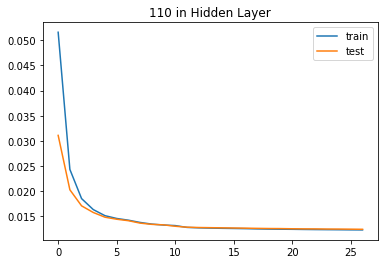

Hidden Nodes: 110
MSE: 0.0125
Non-Orthogonality: 0.057986
Time to Train: 36.42
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 111)               87135     
_________________________________________________________________
output_layer (Dense)         (None, 784)               87808     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 174,943
Trainable params: 174,943
Non-trainable params: 0
_________________________________________________________________


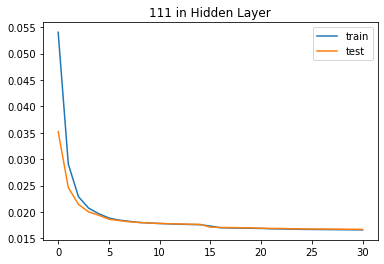

Hidden Nodes: 111
MSE: 0.0168
Non-Orthogonality: 0.058152
Time to Train: 41.48
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 112)               87920     
_________________________________________________________________
output_layer (Dense)         (None, 784)               88592     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 176,512
Trainable params: 176,512
Non-trainable params: 0
_________________________________________________________________


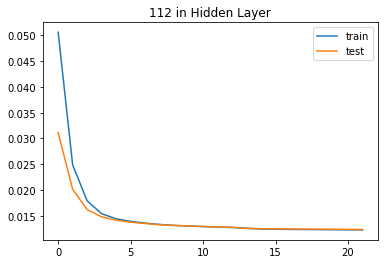

Hidden Nodes: 112
MSE: 0.0125
Non-Orthogonality: 0.058463
Time to Train: 29.15
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 113)               88705     
_________________________________________________________________
output_layer (Dense)         (None, 784)               89376     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 178,081
Trainable params: 178,081
Non-trainable params: 0
_________________________________________________________________


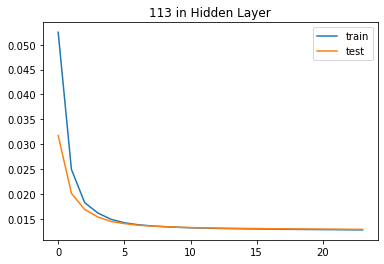

Hidden Nodes: 113
MSE: 0.0130
Non-Orthogonality: 0.058837
Time to Train: 32.88
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 114)               89490     
_________________________________________________________________
output_layer (Dense)         (None, 784)               90160     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 179,650
Trainable params: 179,650
Non-trainable params: 0
_________________________________________________________________


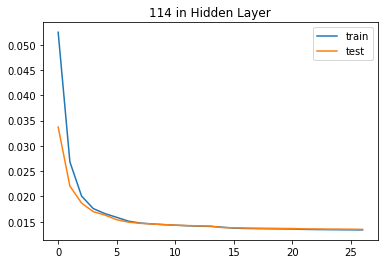

Hidden Nodes: 114
MSE: 0.0136
Non-Orthogonality: 0.058400
Time to Train: 36.23
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 115)               90275     
_________________________________________________________________
output_layer (Dense)         (None, 784)               90944     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 181,219
Trainable params: 181,219
Non-trainable params: 0
_________________________________________________________________


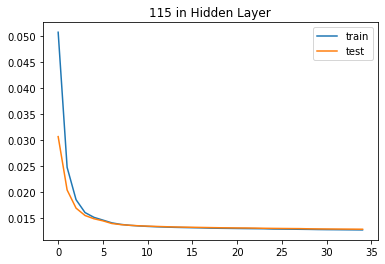

Hidden Nodes: 115
MSE: 0.0130
Non-Orthogonality: 0.058626
Time to Train: 48.02
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 116)               91060     
_________________________________________________________________
output_layer (Dense)         (None, 784)               91728     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 182,788
Trainable params: 182,788
Non-trainable params: 0
_________________________________________________________________


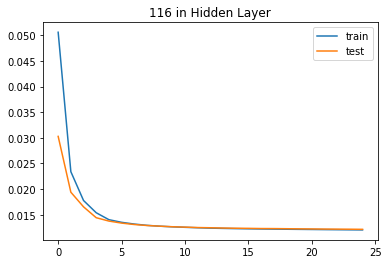

Hidden Nodes: 116
MSE: 0.0123
Non-Orthogonality: 0.057790
Time to Train: 34.18
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 117)               91845     
_________________________________________________________________
output_layer (Dense)         (None, 784)               92512     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 184,357
Trainable params: 184,357
Non-trainable params: 0
_________________________________________________________________


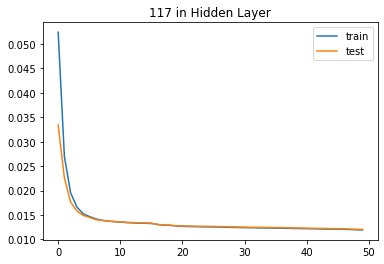

Hidden Nodes: 117
MSE: 0.0121
Non-Orthogonality: 0.055583
Time to Train: 65.64
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 118)               92630     
_________________________________________________________________
output_layer (Dense)         (None, 784)               93296     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 185,926
Trainable params: 185,926
Non-trainable params: 0
_________________________________________________________________


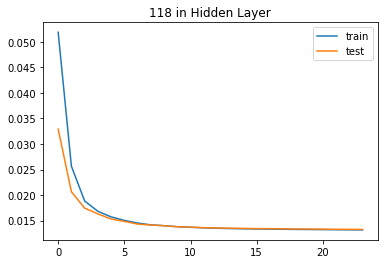

Hidden Nodes: 118
MSE: 0.0134
Non-Orthogonality: 0.058597
Time to Train: 31.95
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 119)               93415     
_________________________________________________________________
output_layer (Dense)         (None, 784)               94080     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 187,495
Trainable params: 187,495
Non-trainable params: 0
_________________________________________________________________


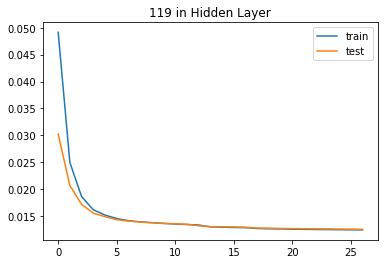

Hidden Nodes: 119
MSE: 0.0126
Non-Orthogonality: 0.057293
Time to Train: 33.52
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 120)               94200     
_________________________________________________________________
output_layer (Dense)         (None, 784)               94864     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 189,064
Trainable params: 189,064
Non-trainable params: 0
_________________________________________________________________


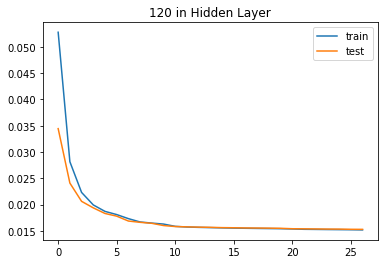

Hidden Nodes: 120
MSE: 0.0154
Non-Orthogonality: 0.056869
Time to Train: 36.55
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 121)               94985     
_________________________________________________________________
output_layer (Dense)         (None, 784)               95648     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 190,633
Trainable params: 190,633
Non-trainable params: 0
_________________________________________________________________


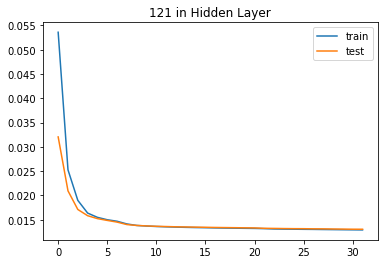

Hidden Nodes: 121
MSE: 0.0132
Non-Orthogonality: 0.056718
Time to Train: 43.39
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 122)               95770     
_________________________________________________________________
output_layer (Dense)         (None, 784)               96432     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 192,202
Trainable params: 192,202
Non-trainable params: 0
_________________________________________________________________


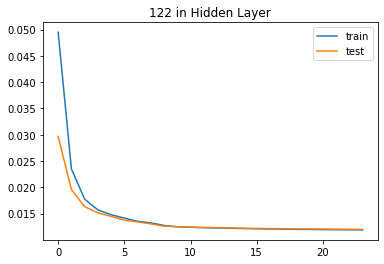

Hidden Nodes: 122
MSE: 0.0121
Non-Orthogonality: 0.058385
Time to Train: 32.86
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 123)               96555     
_________________________________________________________________
output_layer (Dense)         (None, 784)               97216     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 193,771
Trainable params: 193,771
Non-trainable params: 0
_________________________________________________________________


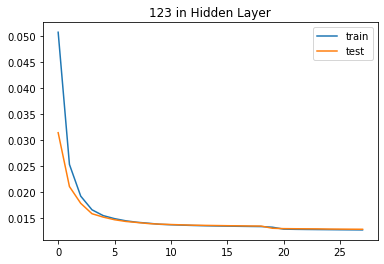

Hidden Nodes: 123
MSE: 0.0129
Non-Orthogonality: 0.057161
Time to Train: 37.47
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 124)               97340     
_________________________________________________________________
output_layer (Dense)         (None, 784)               98000     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 195,340
Trainable params: 195,340
Non-trainable params: 0
_________________________________________________________________


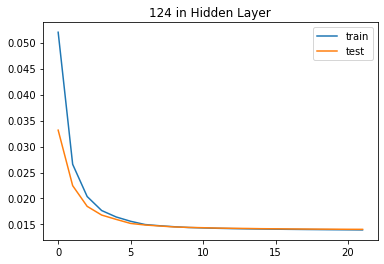

Hidden Nodes: 124
MSE: 0.0142
Non-Orthogonality: 0.057816
Time to Train: 30.89
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 125)               98125     
_________________________________________________________________
output_layer (Dense)         (None, 784)               98784     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 196,909
Trainable params: 196,909
Non-trainable params: 0
_________________________________________________________________


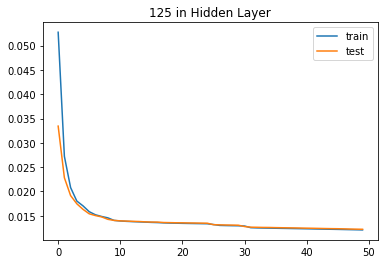

Hidden Nodes: 125
MSE: 0.0123
Non-Orthogonality: 0.055086
Time to Train: 66.03
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 126)               98910     
_________________________________________________________________
output_layer (Dense)         (None, 784)               99568     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 198,478
Trainable params: 198,478
Non-trainable params: 0
_________________________________________________________________


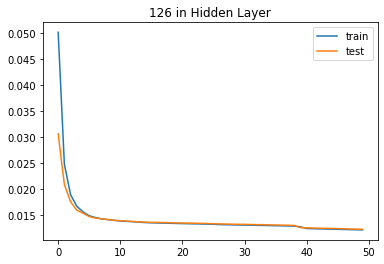

Hidden Nodes: 126
MSE: 0.0124
Non-Orthogonality: 0.054370
Time to Train: 66.09
Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 127)               99695     
_________________________________________________________________
output_layer (Dense)         (None, 784)               100352    
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 200,047
Trainable params: 200,047
Non-trainable params: 0
_________________________________________________________________


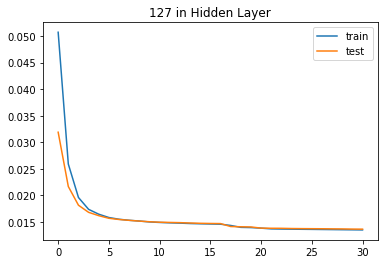

Hidden Nodes: 127
MSE: 0.0138
Non-Orthogonality: 0.057505
Time to Train: 40.27


In [7]:
max_hidden_size = 128
results = {
    'Hidden Nodes':[],
    'MSE': [],
    'Non-orthogonality': [],
    'model': []
}


for hidden_nodes in range(2, max_hidden_size + 1, 1):
    
    # Create network layers
    inputs = keras.Input(shape=image_shape, name='input_layer')
    flatten = keras.layers.Flatten(name='flatten_input_layer')(inputs)
    h = keras.layers.Dense(hidden_nodes, activation='sigmoid', name='hidden_layer_1') (flatten)
    outputs = keras.layers.Dense(total_pixels, activation='relu', name='output_layer') (h)
    reshape =  keras.layers.Reshape((28,28), name='reshape_output_layer') (outputs)
    model = keras.Model(inputs=inputs, outputs=reshape, name = 'MLP')
    model.summary()

    # Define optimizer and metrics
    model.compile(
        optimizer=keras.optimizers.Adam(), # using to avoid learning rate tuning
        loss='MSE',
        metrics=[tf.keras.metrics.MeanSquaredError()]
    )

    # Create callbacks
    earlystop_callback = keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        min_delta=1e-4,
        patience=5
    )
    start_time = time.time()
    # Fit model
    history = model.fit(
        x_train, 
        y_train, 
        batch_size = 1024,
        epochs=50,
        validation_split=0.2,
        use_multiprocessing=True,
        callbacks=[earlystop_callback],
        verbose=0
    )
    end_time = time.time()

    # Plot validation curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title(f"{hidden_nodes} in Hidden Layer")
    plt.legend()
    plt.show()
    
    # Score on test data
    W = model.layers[-2].get_weights()[0].T
    mse = model.evaluate(x_val,  y_val)[1]
    nonorth = measure_nonorthogonality(W)
    print(f"Hidden Nodes: {hidden_nodes}")
    print(f"MSE: {mse:0.4f}")
    print(f"Non-Orthogonality: {nonorth:0.6f}")
    print(f"Time to Train: {end_time - start_time:0.2f}")

    results['Hidden Nodes'].append(hidden_nodes)
    results['MSE'].append(mse)
    results['Non-orthogonality'].append(nonorth)
    results['model'].append(model)

    # Free up memory
    keras.backend.clear_session()

In [8]:
!rm -rf ./logs/

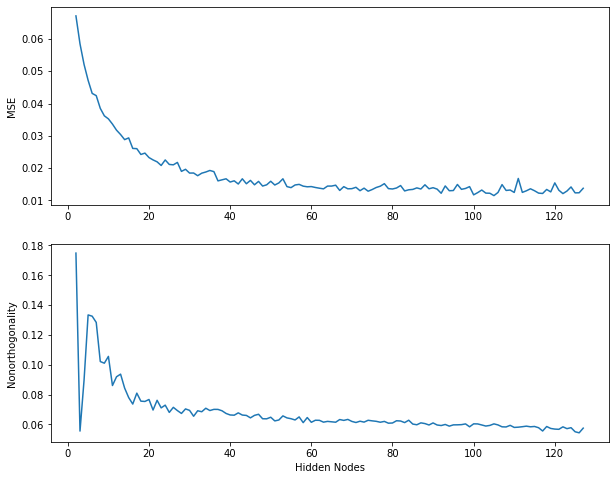

In [15]:
figure, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].plot(results["Hidden Nodes"], results["MSE"])
axes[0].set_ylabel("MSE")

axes[1].plot(results["Hidden Nodes"], results["Non-orthogonality"])
axes[1].set_ylabel("Nonorthogonality")
axes[1].set_xlabel("Hidden Nodes")

plt.show()

A few observations/comments:

1. If we continued to increase the number of nodes, we would eventually see nonorthogonality increase again. However, the input dimension is 28x28 so that may not occur unless the number of hidden nodes passes that point.
2. It visually appears that the two curves are highly correlated (this will be measured below). Generally, this makes sense -- as capacity increases, the network can learn more granular features, increasing orthogonality and performance.

The model with 50 nodes in the output layer will now be re-run and visualized as an example.

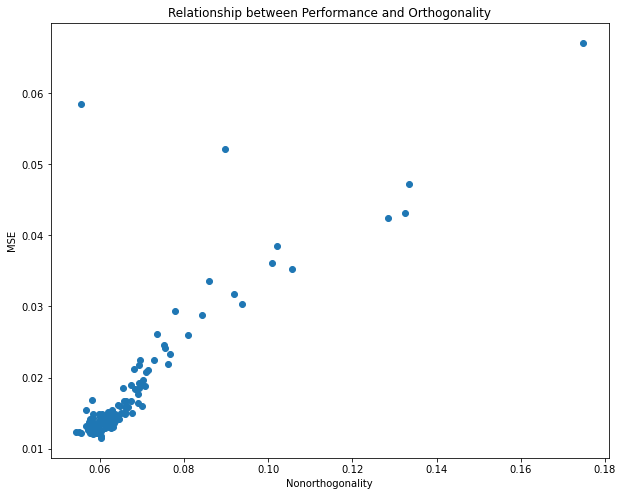

Pearson's Correlation: 0.845


In [71]:
cor  = np.corrcoef(results['MSE'], results["Non-orthogonality"])[0,1]
figure, axes = plt.subplots(1, 1, figsize=(10, 8))

axes.scatter(results["Non-orthogonality"], results["MSE"])
axes.set_ylabel("MSE")
axes.set_xlabel("Nonorthogonality")
axes.set_title("Relationship between Performance and Orthogonality")

plt.show()

print(f"Pearson's Correlation: {cor:0.3f}")

In [43]:
inputs = keras.Input(shape=image_shape, name='input_layer')
flatten = keras.layers.Flatten(name='flatten_input_layer')(inputs)
h = keras.layers.Dense(50, activation='sigmoid', name='hidden_layer_1') (flatten)
outputs = keras.layers.Dense(total_pixels, activation='relu', name='output_layer') (h)
reshape =  keras.layers.Reshape((28,28), name='reshape_output_layer') (outputs)
model = keras.Model(inputs=inputs, outputs=reshape, name = 'MLP')
model.summary()

# Define optimizer and metrics
model.compile(
    optimizer=keras.optimizers.Adam(), # using to avoid learning rate tuning
    loss='MSE',
    metrics=[tf.keras.metrics.MeanSquaredError()]
)
history = model.fit(
    x_train, 
    y_train, 
    batch_size = 1024,
    epochs=50,
    validation_split=0.2,
    use_multiprocessing=True,
    callbacks=[earlystop_callback],
    verbose=0
)

Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_input_layer (Flatten (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 50)                39250     
_________________________________________________________________
output_layer (Dense)         (None, 784)               39984     
_________________________________________________________________
reshape_output_layer (Reshap (None, 28, 28)            0         
Total params: 79,234
Trainable params: 79,234
Non-trainable params: 0
_________________________________________________________________


Output Layer Weights images:


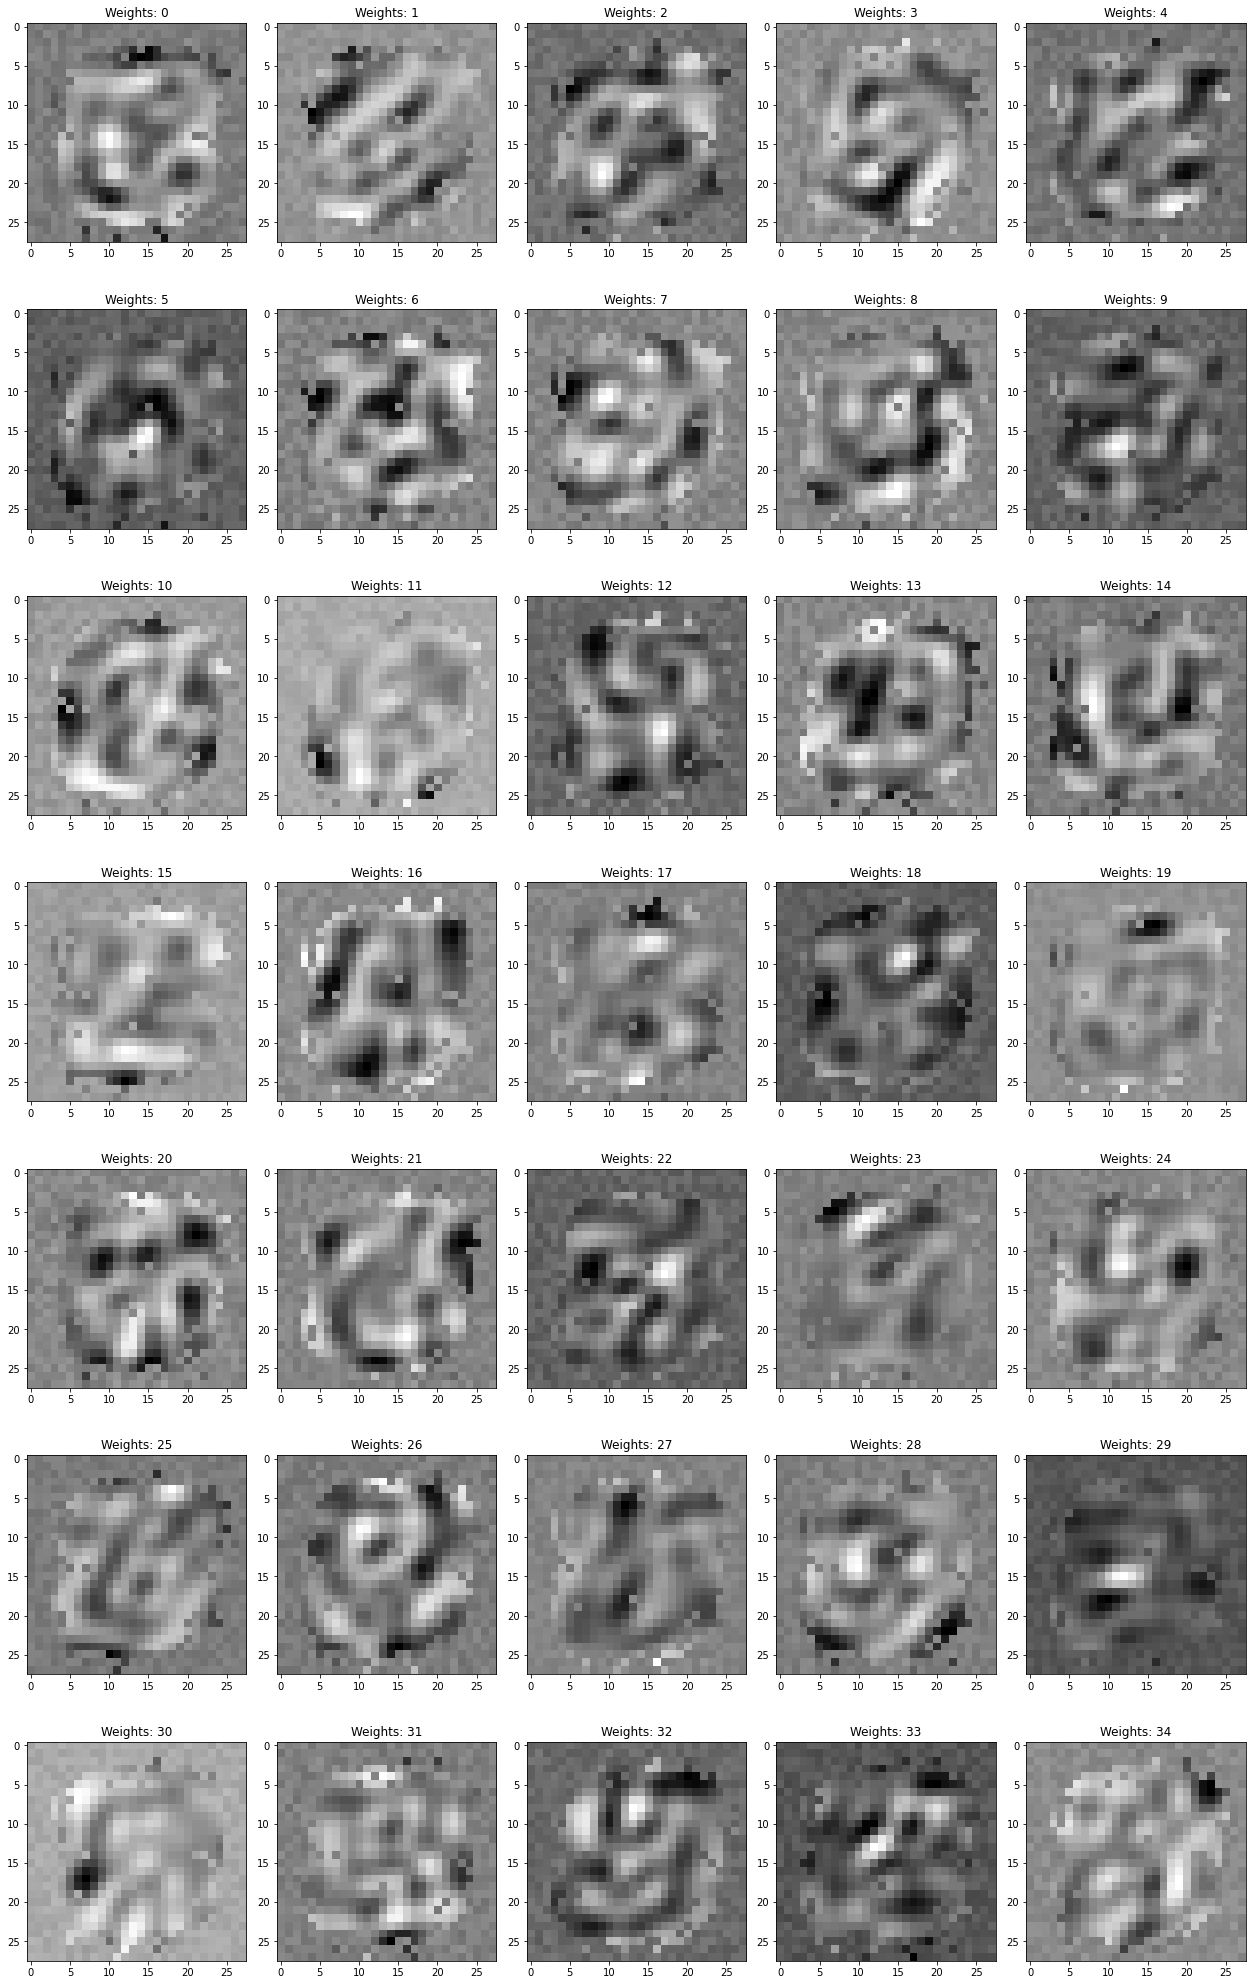

In [44]:
output_layer_weights = model.layers[-2].get_weights()[0]
output_layer_weights = output_layer_weights.reshape(-1, 28, 28)

print("Output Layer Weights images:")
plot_images(output_layer_weights)

It may be interesting to view the input weights as well for comparison.

Input Layer Weights images:


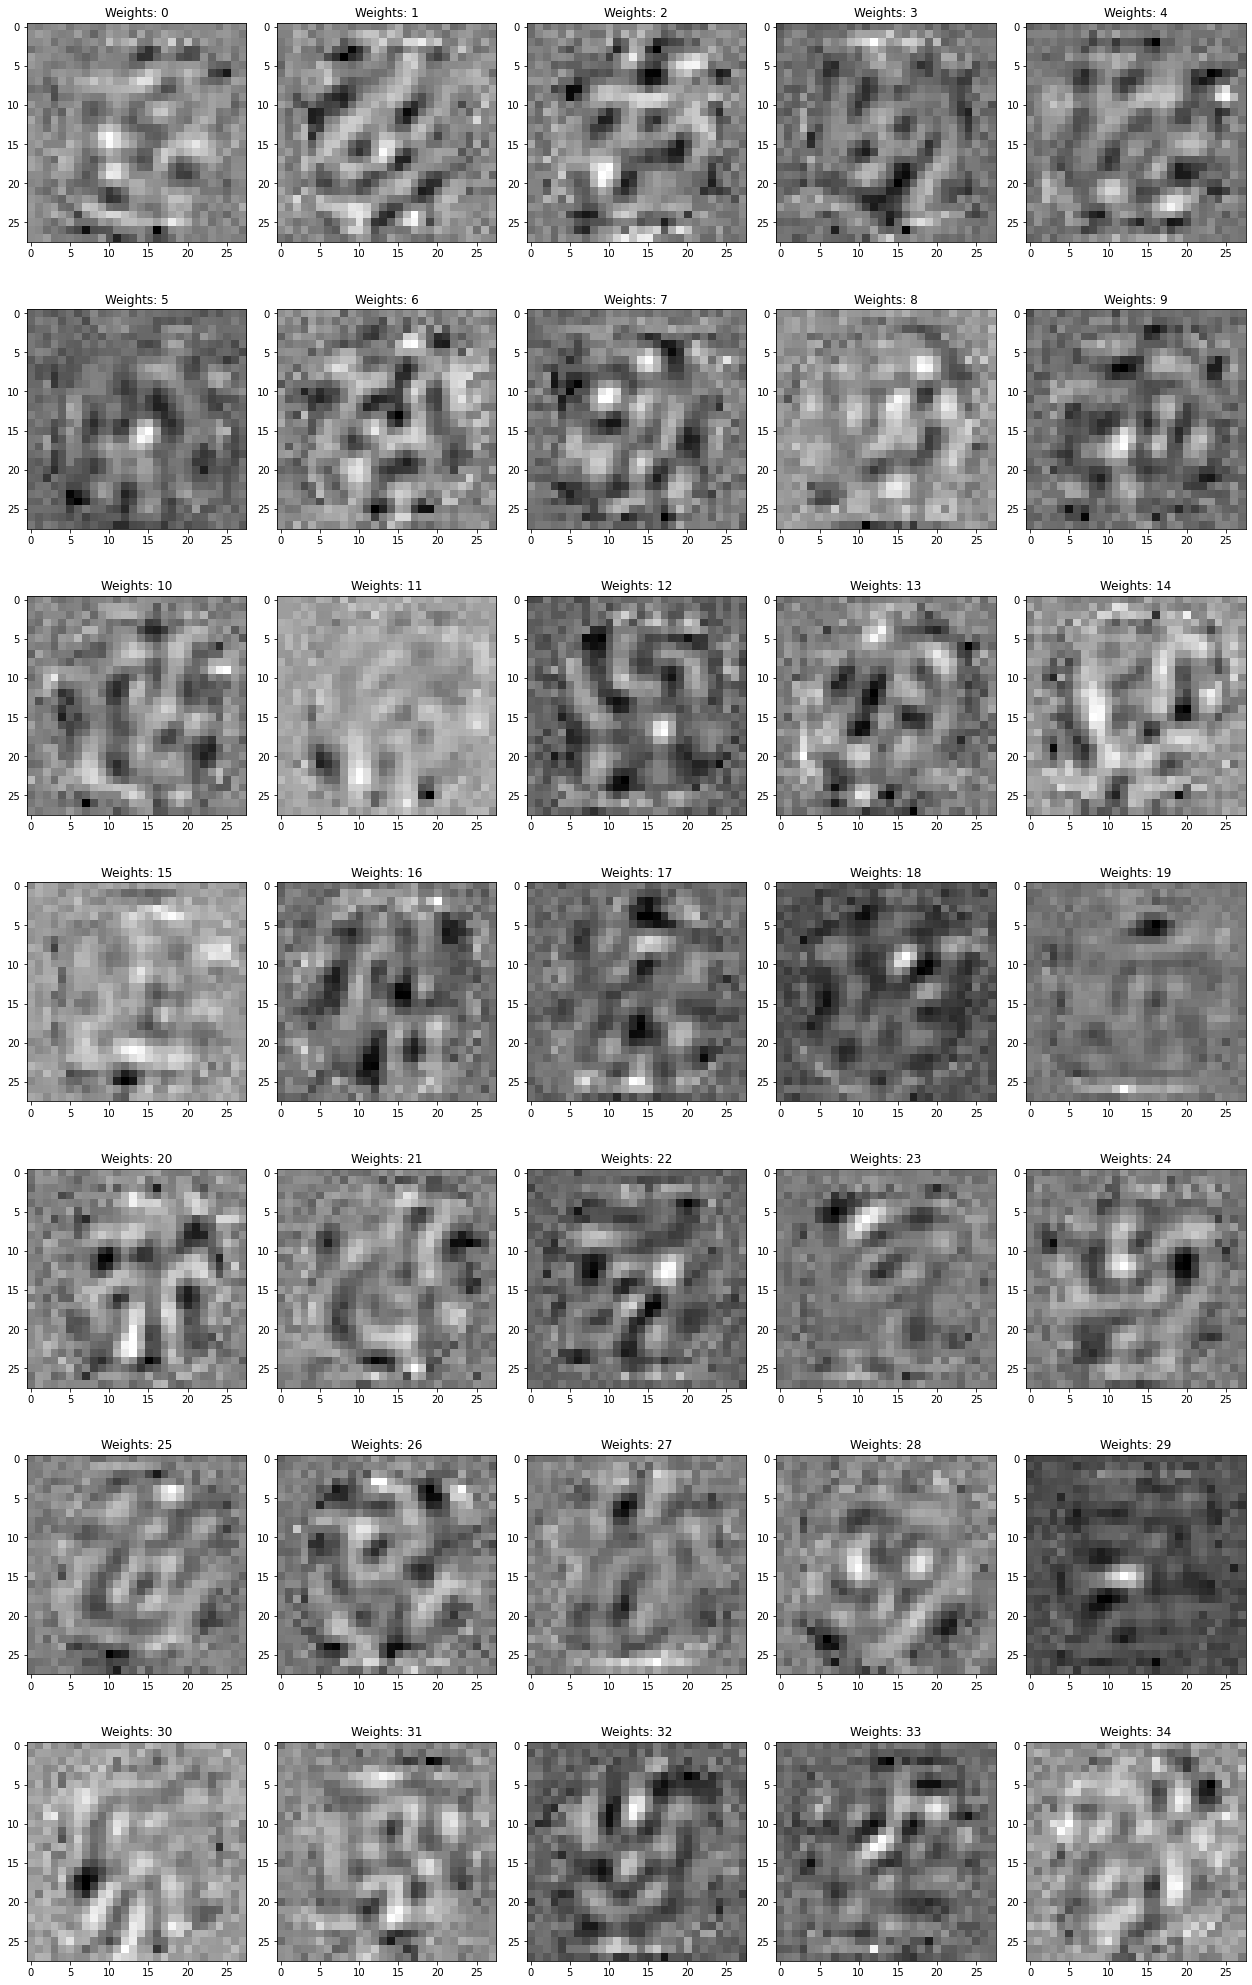

In [62]:
input_layer_weights = model.layers[-3].get_weights()[0]
input_layer_weights = input_layer_weights.T.reshape(-1, 28, 28)

print("Input Layer Weights images:")
plot_images(input_layer_weights)

There appears to be some correlation between the input weights and output weights.